### ÎÇ†Ïî® ÏòàÏ∏°
- date: ÎÇ†Ïßú
- precipitation: Í∞ïÏàòÎüâ (Î¨ºÏù¥ ÎπÑ, ÏßÑÎààÍπ®ÎπÑ, Îàà, Ïö∞Î∞ï, Ïù¥Ïä¨ÎπÑ Îì± ÏßÄÌëúÎ©¥Í≥º Ïó¥Î¶∞ ÏàòÏó≠Ïóê Îñ®Ïñ¥ÏßÄÎäî Î™®Îì† ÌòïÌÉú)
- temp_max: ÏµúÎåÄ Ïò®ÎèÑ
- temp_min: ÏµúÏ†Ä Ïò®ÎèÑ
- wind: ÌíçÏÜç
- weather: ÎÇ†Ïî®
> drizzle(Í±¥Ï°∞), rain(ÎπÑ), sun(ÎßëÏùå), snow(Îàà), fog(ÏïàÍ∞ú)

In [1]:
import pandas as pd

w_df = pd.read_csv('./datasets/seattle-weather.csv', low_memory=False)
w_df

date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

In [2]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


#### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [3]:
pre_w_df = w_df.drop(labels=['date'], axis=1)

In [4]:
pre_w_df.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
pre_w_df.duplicated().sum()

8

In [6]:
pre_w_df.drop_duplicates(inplace=True)

In [7]:
pre_w_df = pre_w_df.reset_index(drop=True)

In [8]:
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1448            8.6       4.4       1.7   2.9     rain
1449            1.5       5.0       1.7   1.3     rain
1450            0.0       7.2       0.6   2.6      fog
1451            0.0       5.6      -1.0   3.4      sun
1452            0.0       5.6      -2.1   3.5      sun

[1453 rows x 5 columns]

In [9]:
pre_w_df.duplicated().sum()

0

#### DTC

In [10]:
pre_w_df = w_df.drop(labels=['date'], axis=1)

In [11]:
pre_w_df.duplicated().sum()

8

In [12]:
pre_w_df.drop_duplicates(inplace=True)

In [13]:
pre_w_df = pre_w_df.reset_index(drop=True)

In [14]:
pre_w_df.duplicated().sum()

0

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
pre_w_df['weather'] = encoder.fit_transform(pre_w_df['weather'].tolist())

In [16]:
pre_w_df.weather.value_counts()

weather
2    641
4    632
1    101
0     53
3     26
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_pre_w = std.fit_transform(pre_w_df.iloc[:, :-1])

In [18]:
std_pre_w_df = pd.DataFrame(std_pre_w, columns=pre_w_df.iloc[:, :-1].columns)
std_pre_w_df['weather'] = pre_w_df.weather
std_pre_w_df

precipitation  temp_max  temp_min      wind  weather
0         -0.455155 -0.492401 -0.642601  1.011504        0
1          1.173541 -0.791984 -1.081014  0.872596        2
2         -0.335618 -0.642193 -0.204188 -0.655391        2
3          2.578104 -0.574106 -0.523034  1.011504        2
4         -0.260907 -1.023480 -1.081014  1.983860        2
...             ...       ...       ...       ...      ...
1448       0.829871 -1.636264 -1.300220 -0.238667        2
1449      -0.231023 -1.554560 -1.300220 -1.349931        2
1450      -0.455155 -1.254976 -1.519426 -0.447029        1
1451      -0.455155 -1.472855 -1.838272  0.108603        4
1452      -0.455155 -1.472855 -2.057478  0.178056        4

[1453 rows x 5 columns]

In [19]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
features = std_pre_w_df.iloc[:, :-1]
for column in features.columns:
    std_pre_w_df.drop(
        std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].shape[0]}Í±¥')

precipitation: 0Í±¥
temp_max: 0Í±¥
temp_min: 0Í±¥
wind: 0Í±¥


In [20]:
pre_w_df = pre_w_df.iloc[std_pre_w_df.index].reset_index(drop=True)
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3               2.5       4.4       2.2   2.2        2
4               0.0       7.2       2.8   2.3        2
...             ...       ...       ...   ...      ...
1224            0.0       4.4       0.0   2.5        4
1225            8.6       4.4       1.7   2.9        2
1226            1.5       5.0       1.7   1.3        2
1227            0.0       7.2       0.6   2.6        1
1228            0.0       5.6      -1.0   3.4        4

[1229 rows x 5 columns]

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# DecisionTreeClassifier Î™®Îç∏ Ï¥àÍ∏∞Ìôî
dtc = DecisionTreeClassifier()

# featuresÏôÄ targets ÏÑ§Ï†ï
features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

# train_test_splitÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=124)

# Î™®Îç∏ ÌõàÎ†®
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [177]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc, 
    out_file='./images/weather_dtc01.dot', 
    class_names=encoder.classes_, 
    feature_names=features.columns, 
    impurity=True,
    filled=True
)

In [178]:
import graphviz

with open('./images/weather_dtc01.dot') as f:
    weather_dtc01 = f.read()

weather_dtc01_graph = graphviz.Source(weather_dtc01)

In [179]:
weather_dtc01_graph.render(filename="weather_dtc01", directory="./images", format="png")

'images\\weather_dtc01.png'

<img src='./images/weather_dtc01.png'>

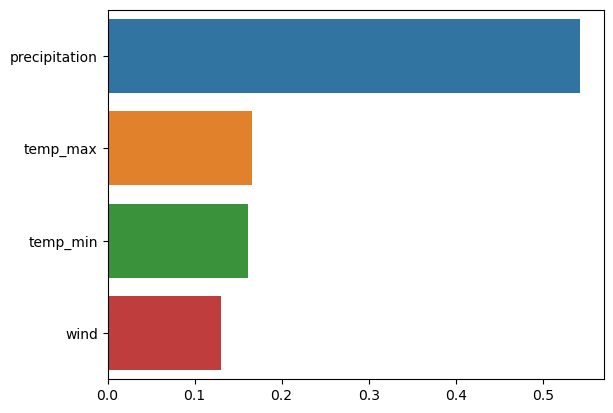

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

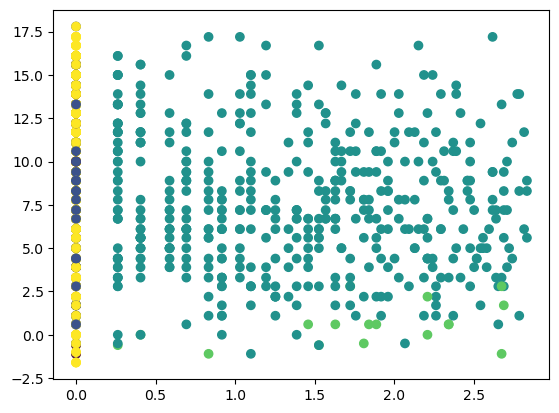

In [181]:
plt.scatter(features.iloc[:, 0], features.iloc[:, 2], c=targets)

In [182]:
import numpy as np

# ClassifierÏùò Decision BoundaryÎ•º ÏãúÍ∞ÅÌôî ÌïòÎäî Ìï®Ïàò
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # ÌïôÏäµ Îç∞Ïù¥ÌÉÄ scatter plotÏúºÎ°ú ÎÇòÌÉÄÎÇ¥Í∏∞
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # Ìò∏Ï∂ú ÌååÎùºÎØ∏ÌÑ∞Î°ú Îì§Ïñ¥Ïò® training Îç∞Ïù¥ÌÉÄÎ°ú model ÌïôÏäµ . 
    model.fit(X.values, y)
    # meshgrid ÌòïÌÉúÏù∏ Î™®Îì† Ï¢åÌëúÍ∞íÏúºÎ°ú ÏòàÏ∏° ÏàòÌñâ. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() Î•º Ïù¥Ïö©ÌïòÏó¨ class boundary Î•º visualization ÏàòÌñâ. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

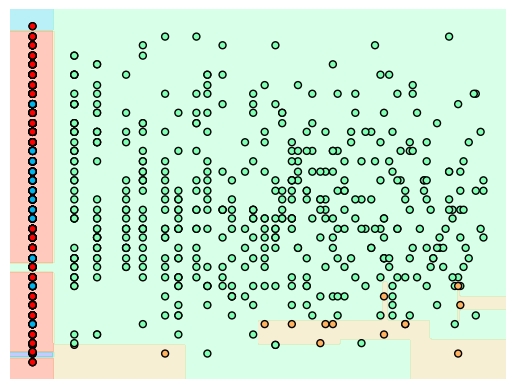

In [183]:
features_0_2 = features.iloc[:, [0, 2]] 
visualize_boundary(dtc, features_0_2, targets)

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier(min_samples_leaf=20)

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# Î™®Îç∏ ÌõàÎ†®
dtc.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20)

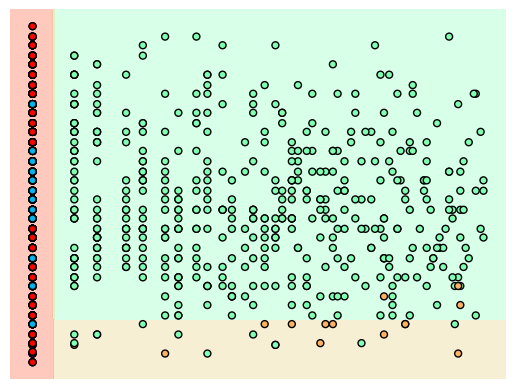

In [185]:
features_0_2 = features.iloc[:, [0, 2]] 
visualize_boundary(dtc, features_0_2, targets)

In [215]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# DecisionTreeClassifier Î™®Îç∏ Ï¥àÍ∏∞Ìôî
dtc = DecisionTreeClassifier()

# featuresÏôÄ targets ÏÑ§Ï†ï
features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

# train_test_splitÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=124)

# Î™®Îç∏ ÌõàÎ†®
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [216]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Î™®Îç∏Ïùò ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞
y_pred = dtc.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
# 0.7560975609756098
# F1 Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}\nAccuracy Score: {accuracy}')

F1 Score: 0.7616563403498628
Accuracy Score: 0.7398373983739838


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### 1 Cycle
Ï†ïÌôïÎèÑÍ∞Ä 0.75Ï†ïÎèÑÎ°ú ÎÇòÏÅòÏßÄ ÏïäÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏Îã§. Îçî ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÏ§ëÏùÑ ÎßûÏ∂∞Î≥¥Í≥†Ïûê ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | F1 Score  |
|--------|---------|---------|
| 1 Cycle| 0.7561  | 0.7617  |

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# DecisionTreeClassifier Î™®Îç∏ Ï¥àÍ∏∞Ìôî
dtc = DecisionTreeClassifier()

# featuresÏôÄ targets ÏÑ§Ï†ï
features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

# train_test_splitÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=124)

# SMOTEÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# Î™®Îç∏ ÌõàÎ†®
dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [189]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc, 
    out_file='./images/weather_dtc02.dot', 
    class_names=encoder.classes_, 
    feature_names=features.columns, 
    impurity=True,
    filled=True
)

In [190]:
import graphviz

with open('./images/weather_dtc02.dot') as f:
    weather_dtc01 = f.read()

weather_dtc01_graph = graphviz.Source(weather_dtc01)

In [191]:
weather_dtc01_graph.render(filename="weather_dtc02", directory="./images", format="png")

'images\\weather_dtc02.png'

<img src='./images/weather_dtc02.png'>

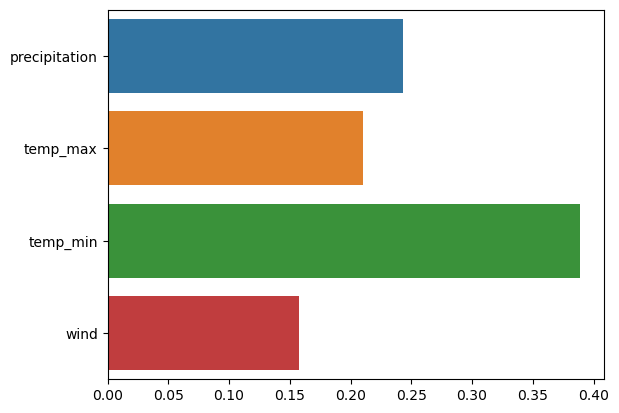

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

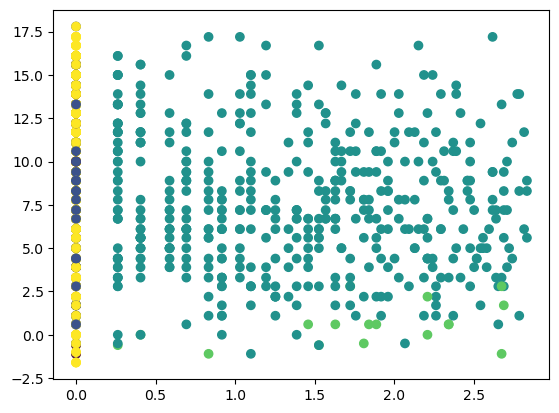

In [193]:
plt.scatter(features.iloc[:, 0], features.iloc[:, 2], c=targets)

In [194]:
import numpy as np

# ClassifierÏùò Decision BoundaryÎ•º ÏãúÍ∞ÅÌôî ÌïòÎäî Ìï®Ïàò
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # ÌïôÏäµ Îç∞Ïù¥ÌÉÄ scatter plotÏúºÎ°ú ÎÇòÌÉÄÎÇ¥Í∏∞
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # Ìò∏Ï∂ú ÌååÎùºÎØ∏ÌÑ∞Î°ú Îì§Ïñ¥Ïò® training Îç∞Ïù¥ÌÉÄÎ°ú model ÌïôÏäµ . 
    model.fit(X.values, y)
    # meshgrid ÌòïÌÉúÏù∏ Î™®Îì† Ï¢åÌëúÍ∞íÏúºÎ°ú ÏòàÏ∏° ÏàòÌñâ. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() Î•º Ïù¥Ïö©ÌïòÏó¨ class boundary Î•º visualization ÏàòÌñâ. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

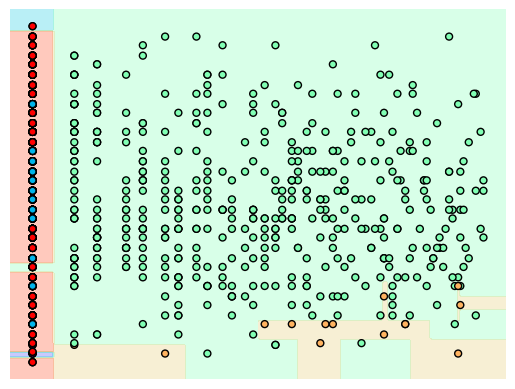

In [195]:
features_0_2 = features.iloc[:, [0, 2]] 
visualize_boundary(dtc, features_0_2, targets)

In [196]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier(min_samples_leaf=20)

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# SMOTEÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# Î™®Îç∏ ÌõàÎ†®
dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier(min_samples_leaf=20)

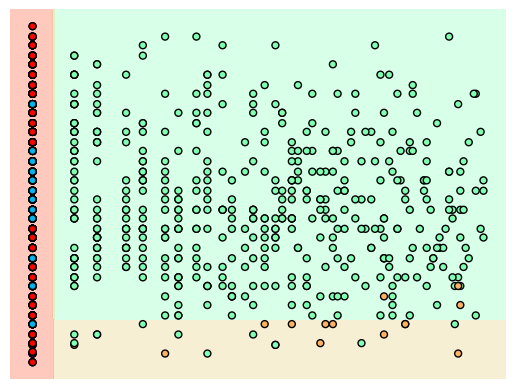

In [197]:
features_0_2 = features.iloc[:, [0, 2]] 
visualize_boundary(dtc, features_0_2, targets)

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier(min_samples_leaf=20)

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# SMOTEÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# Î™®Îç∏ ÌõàÎ†®
dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier(min_samples_leaf=20)

In [214]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Î™®Îç∏Ïùò ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞
y_pred = dtc.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'F1 Score: {f1}\nAccuracy Score: {accuracy}')
# F1 Score: 0.7616563403498628
# Accuracy Score: 0.7398373983739838

F1 Score: 0.7563265010699148
Accuracy Score: 0.6991869918699187


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### Last Cycle
Ïò§Î≤ÑÏÉòÌîåÎßÅÏùÑ ÌÜµÌï¥ ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÏ§ëÏùÑ ÎßûÏ∑ÑÎçîÎãà Ïò§ÌûàÎ†§ Ï†ÑÎ≥¥Îã§ ÎÇÆÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏Îã§. ÎÖ∏Ïù¥Ï¶àÍ∞Ä Ï∂îÍ∞ÄÎêú Í≤É Í∞ôÎã§.    
Îçî ÏÑ±Îä•ÏùÑ Ïò¨Î¶¨Í∏∞Îäî Ïñ¥Î†§Ïö∏ Í≤É Í∞ôÎã§. SVC Î∞©ÏãùÏùÑ ÏÇ¨Ïö©ÌïòÍ≥†Ïûê ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | F1 Score  |
|--------|---------|---------|
| 1 Cycle| 0.7561  | 0.7617  |
| 2 Cycle| 0.6992  | 0.7563  |

### SVC

In [45]:
pre_w_df = w_df.copy()

In [46]:
pre_w_df.drop(labels=['date'], axis=1, inplace=True)
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9     rain
1457            1.5       5.0       1.7   1.3     rain
1458            0.0       7.2       0.6   2.6      fog
1459            0.0       5.6      -1.0   3.4      sun
1460            0.0       5.6      -2.1   3.5      sun

[1461 rows x 5 columns]

In [47]:
pre_w_df.drop_duplicates(inplace=True)

In [48]:
pre_w_df = pre_w_df.reset_index(drop=True)

In [49]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
pre_w_df['weather'] = encoder.fit_transform(pre_w_df['weather'].tolist())

In [50]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_pre_w = std.fit_transform(pre_w_df.iloc[:, :-1])

In [51]:
std_pre_w_df = pd.DataFrame(std_pre_w, columns=pre_w_df.iloc[:, :-1].columns)
std_pre_w_df['weather'] = pre_w_df.weather
std_pre_w_df

precipitation  temp_max  temp_min      wind  weather
0         -0.455155 -0.492401 -0.642601  1.011504        0
1          1.173541 -0.791984 -1.081014  0.872596        2
2         -0.335618 -0.642193 -0.204188 -0.655391        2
3          2.578104 -0.574106 -0.523034  1.011504        2
4         -0.260907 -1.023480 -1.081014  1.983860        2
...             ...       ...       ...       ...      ...
1448       0.829871 -1.636264 -1.300220 -0.238667        2
1449      -0.231023 -1.554560 -1.300220 -1.349931        2
1450      -0.455155 -1.254976 -1.519426 -0.447029        1
1451      -0.455155 -1.472855 -1.838272  0.108603        4
1452      -0.455155 -1.472855 -2.057478  0.178056        4

[1453 rows x 5 columns]

In [52]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
features = std_pre_w_df.iloc[:, :-1]
for column in features.columns:
    std_pre_w_df.drop(
        std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].shape[0]}Í±¥')

precipitation: 0Í±¥
temp_max: 0Í±¥
temp_min: 0Í±¥
wind: 0Í±¥


In [53]:
pre_w_df = pre_w_df.iloc[std_pre_w_df.index].reset_index(drop=True)
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3               2.5       4.4       2.2   2.2        2
4               0.0       7.2       2.8   2.3        2
...             ...       ...       ...   ...      ...
1224            0.0       4.4       0.0   2.5        4
1225            8.6       4.4       1.7   2.9        2
1226            1.5       5.0       1.7   1.3        2
1227            0.0       7.2       0.6   2.6        1
1228            0.0       5.6      -1.0   3.4        4

[1229 rows x 5 columns]

Text(0.5, 1.0, 'Correlation')

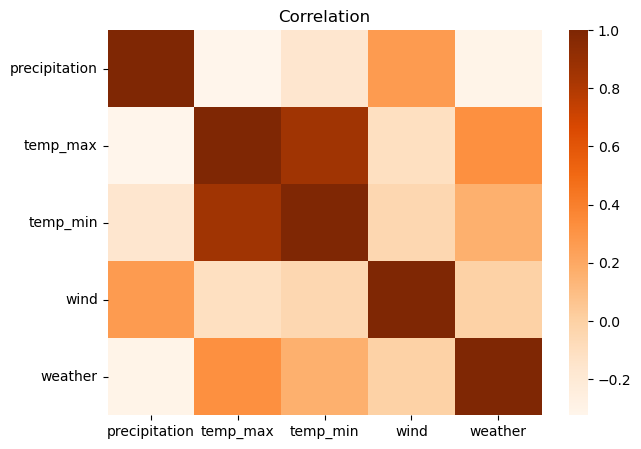

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = pre_w_df.corr()
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap="Oranges")
heatmap.set_title("Correlation")

In [55]:
corr[['weather']].sort_values(by="weather", ascending=False)[1:]

weather
temp_max       0.324727
temp_min       0.165362
wind          -0.007354
precipitation -0.304603

In [56]:
pre_w_df.weather.value_counts()

weather
4    553
2    517
1     97
0     45
3     17
Name: count, dtype: int64

In [253]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# SMOTEÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=124)
features_resampled, targets_resampled = smote.fit_resample(features, targets)

# ÌååÏù¥ÌîÑ ÎùºÏù∏ÏúºÎ°ú Íµ¨Ï∂ïÌïú Í∞Å ÌååÏù¥ÌîÑÏùò Ïù¥Î¶ÑÏùÑ Î®ºÏ†Ä ÏûëÏÑ±ÌïòÍ≥†, 
# (_)Ïñ∏ÎçîÎ∞îÎ•º Îëê Î≤à(__) ÏûëÏÑ±Ìïú Îí§ ÌååÎùºÎØ∏ÌÑ∞ Ïù¥Î¶ÑÏùÑ ÏûëÏÑ±ÌïúÎã§.
parameters = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf']
}

svc = SVC(probability=True)

# 1. ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨Ï∂ï
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])

# 2. GridSearchCV
g_svc = GridSearchCV(svc_pipe, param_grid=parameters, cv=5, refit=True, return_train_score=True)

# 3. ÌõàÎ†®
g_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [256]:
# ÎÑòÌååÏù¥ Î∞∞Ïó¥ÏùÑ ÌåêÎã§Ïä§Ïùò ÏãúÎ¶¨Ï¶àÎ°ú Î≥ÄÌôò
targets_resampled_series = pd.Series(targets_resampled)

# ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò ÌôïÏù∏
print(targets_resampled_series.value_counts())

weather
0    553
2    553
4    553
3    553
1    553
Name: count, dtype: int64


In [201]:
result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(result_df['params'][68])
display(result_df)

{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel': 'linear'}


params  mean_test_score  \
0   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.626686   
1   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.449643   
2   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.626686   
3   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.449643   
4   {'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...         0.626686   
..                                                ...              ...   
67  {'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...         0.775158   
68  {'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...         0.837258   
69  {'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...         0.640847   
70  {'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...         0.837258   
71  {'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...         0.459795   

    rank_test_score  
0                50  
1                59  
2                50  
3                59  
4                50  
..              ...  
67               23  
68                1  
69               49  
70                1  
71               57  

[72 rows x 3 columns]

In [202]:
svc = g_svc.best_estimator_
prediction = svc.predict(X_test)

In [203]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

Ïò§Ï∞® ÌñâÎ†¨
[[  0   0   0   0   5]
 [  0   0   0   0  10]
 [  0   0 110   0  11]
 [  0   0   3   1   0]
 [  0   0   0   0 106]]
Ï†ïÌôïÎèÑ: 0.8821, Ï†ïÎ∞ÄÎèÑ: 0.5553, Ïû¨ÌòÑÏú®: 0.4318, F1: 0.4462
################################################################################


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


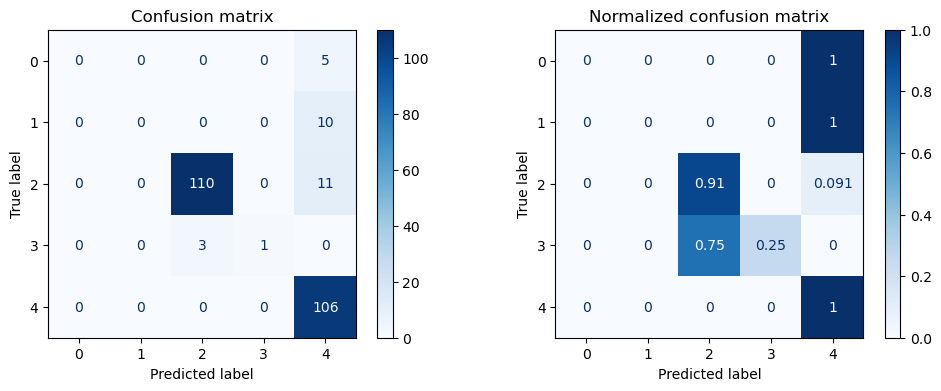

In [204]:
get_evaluation(y_test, prediction, svc, X_test)

In [205]:
svc = SVC(C=100, kernel='linear', probability=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train.values, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=100, kernel='linear', probability=True))])

In [206]:
prediction = svc_pipe.predict(X_test.values)

Ïò§Ï∞® ÌñâÎ†¨
[[  0   0   0   0   5]
 [  0   0   0   0  10]
 [  0   0 109   1  11]
 [  0   0   1   3   0]
 [  0   0   0   0 106]]
Ï†ïÌôïÎèÑ: 0.8862, Ï†ïÎ∞ÄÎèÑ: 0.5088, Ïû¨ÌòÑÏú®: 0.5302, F1: 0.5169
################################################################################


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


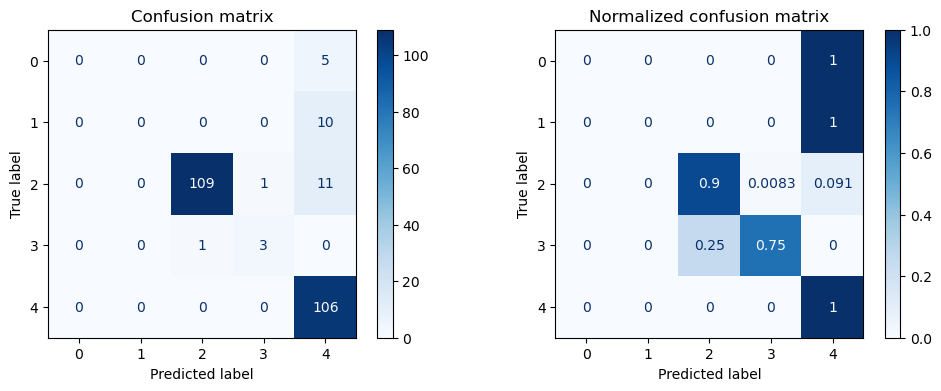

In [207]:
get_evaluation(y_test, prediction, svc_pipe, X_test.values)

#### 1 Cycle
Ïò§Î≤ÑÏÉòÌîåÎßÅ, ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨Ï∂ï, Ïä§ÏºÄÏùºÎßÅÏùÑ ÏßÑÌñâÌïòÏòÄÎäîÎç∞, ÎÜíÏùÄ Ï†ïÌôïÎèÑÏóê ÎπÑÌï¥ Ïù¥Ïô∏Ïùò Ï∏°Ï†ïÏπòÎäî ÎÇÆÏùÄ ÏàòÏπòÎ•º Î≥¥Ïù∏Îã§.  
Ïò§Î≤ÑÏÉòÌîåÎßÅÏùÑ ÏßÑÌñâÌïòÏßÄ ÏïäÍ≥† ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÎßåÏùÑ ÏÇ¨Ïö©Ìï¥Î≥¥Í≥†Ïûê ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | F1 Score  |
|--------|---------|---------|
| 1 Cycle| 0.8862  | 0.5169  |

In [233]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# ÌååÏù¥ÌîÑ ÎùºÏù∏ÏúºÎ°ú Íµ¨Ï∂ïÌïú Í∞Å ÌååÏù¥ÌîÑÏùò Ïù¥Î¶ÑÏùÑ Î®ºÏ†Ä ÏûëÏÑ±ÌïòÍ≥†, 
# (_)Ïñ∏ÎçîÎ∞îÎ•º Îëê Î≤à(__) ÏûëÏÑ±Ìïú Îí§ ÌååÎùºÎØ∏ÌÑ∞ Ïù¥Î¶ÑÏùÑ ÏûëÏÑ±ÌïúÎã§.
parameters = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf']
}

svc = SVC(probability=True)

# 1. ÌååÏù¥ÌîÑÎùºÏù∏ Íµ¨Ï∂ï
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])

# 2. GridSearchCV
g_svc = GridSearchCV(svc_pipe, param_grid=parameters, cv=5, refit=True, return_train_score=True)

# 3. ÌõàÎ†®
g_svc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [236]:
result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(result_df['params'][53])
display(result_df)

{'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


params  mean_test_score  \
0   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.699912   
1   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.449643   
2   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.699912   
3   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.449643   
4   {'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...         0.699912   
..                                                ...              ...   
67  {'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...         0.777199   
68  {'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...         0.838273   
69  {'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...         0.692748   
70  {'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...         0.838273   
71  {'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...         0.462866   

    rank_test_score  
0                49  
1                60  
2                49  
3                60  
4                49  
..              ...  
67               34  
68                2  
69               55  
70                2  
71               56  

[72 rows x 3 columns]

In [235]:
result_df[result_df['rank_test_score'] == 1]

params  mean_test_score  \
53  {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel...         0.839283   

    rank_test_score  
53                1

In [237]:
svc = g_svc.best_estimator_
prediction = svc.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ïò§Ï∞® ÌñâÎ†¨
[[  0   0   0   0   9]
 [  0   0   0   0  19]
 [  0   0  96   1   7]
 [  0   0   2   1   0]
 [  0   0   0   0 111]]
Ï†ïÌôïÎèÑ: 0.8455, Ï†ïÎ∞ÄÎèÑ: 0.4480, Ïû¨ÌòÑÏú®: 0.4513, F1: 0.4429
################################################################################


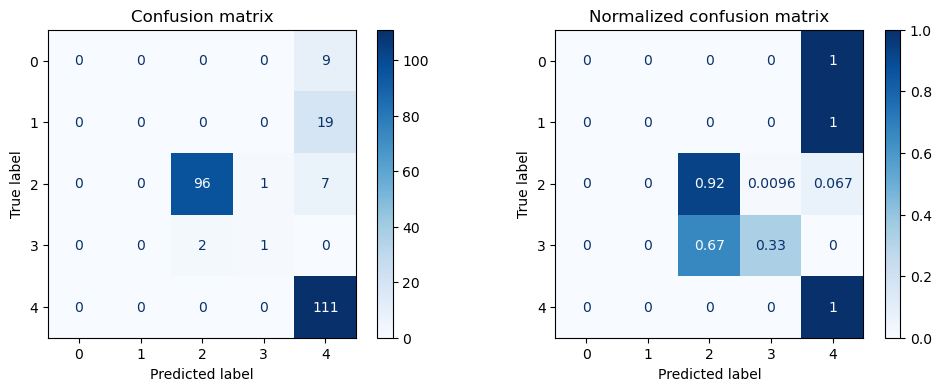

In [238]:
get_evaluation(y_test, prediction, svc, X_test)

In [241]:
svc = SVC(C=10, kernel='rbf', probability=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
svc_pipe.fit(X_train.values, y_train)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=10, probability=True))])

In [242]:
prediction = svc_pipe.predict(X_test.values)

Ïò§Ï∞® ÌñâÎ†¨
[[  1   0   0   0   8]
 [  0   0   0   0  19]
 [  0   0  93   4   7]
 [  0   0   2   1   0]
 [  2   0   0   0 109]]
Ï†ïÌôïÎèÑ: 0.8293, Ï†ïÎ∞ÄÎèÑ: 0.4549, Ïû¨ÌòÑÏú®: 0.4641, F1: 0.4419
################################################################################


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


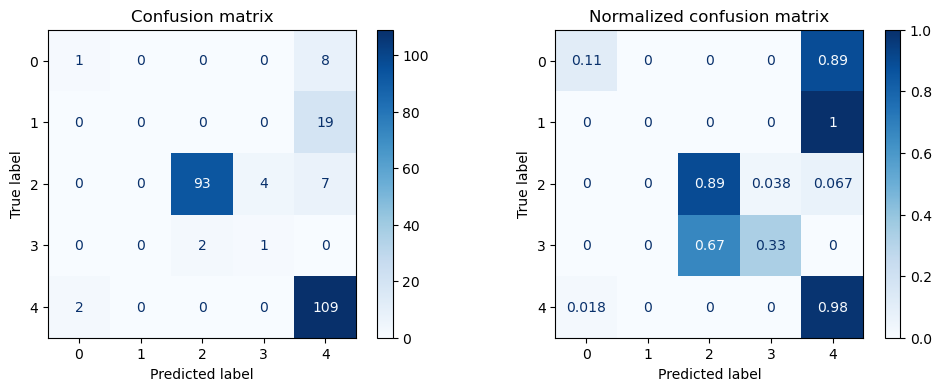

In [243]:
get_evaluation(y_test, prediction, svc_pipe, X_test.values)

#### Last Cycle
Ïò§Î≤ÑÏÉòÌîåÎßÅÏùÑ ÌïòÏßÄ ÏïäÍ≥† ÌõàÎ†®ÏãúÏº∞ÎçîÎãà Î™®Îç∏ ÏÑ±Îä•Ïù¥ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÎÇÆÏïÑÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.  
SVCÎ∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Î•º ÌõàÎ†®ÏãúÌÇ¨ ÎïåÎäî Ïò§Î≤ÑÏÉòÌîåÎßÅÏùÑ ÌïòÎäî Í≤ÉÏù¥ Îçî Ï¢ãÏùÄ Î™®Îç∏ÏùÑ ÎßåÎì§ Ïàò ÏûàÎäî ÎìØÌïòÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | F1 Score  |
|--------|---------|---------|
| 1 Cycle| 0.8862  | 0.5169  |
| 2 Cycle| 0.8293  | 0.4419  |

### KNN

In [245]:
pre_w_df = w_df.copy()

In [246]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
pre_w_df['weather'] = encoder.fit_transform(pre_w_df['weather'].tolist())

In [247]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_pre_w = std.fit_transform(pre_w_df.iloc[:, :-1])

In [248]:
std_pre_w_df = pd.DataFrame(std_pre_w, columns=pre_w_df.iloc[:, :-1].columns)
std_pre_w_df['weather'] = pre_w_df.weather
std_pre_w_df

precipitation  temp_max  temp_min      wind  weather
0         -0.455155 -0.492401 -0.642601  1.011504        0
1          1.173541 -0.791984 -1.081014  0.872596        2
2         -0.335618 -0.642193 -0.204188 -0.655391        2
3          2.578104 -0.574106 -0.523034  1.011504        2
4         -0.260907 -1.023480 -1.081014  1.983860        2
...             ...       ...       ...       ...      ...
1448       0.829871 -1.636264 -1.300220 -0.238667        2
1449      -0.231023 -1.554560 -1.300220 -1.349931        2
1450      -0.455155 -1.254976 -1.519426 -0.447029        1
1451      -0.455155 -1.472855 -1.838272  0.108603        4
1452      -0.455155 -1.472855 -2.057478  0.178056        4

[1453 rows x 5 columns]

In [249]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
features = std_pre_w_df.iloc[:, :-1]
for column in features.columns:
    std_pre_w_df.drop(
        std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].shape[0]}Í±¥')

precipitation: 0Í±¥
temp_max: 0Í±¥
temp_min: 0Í±¥
wind: 0Í±¥


In [250]:
pre_w_df = pre_w_df.iloc[std_pre_w_df.index].reset_index(drop=True)
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3               2.5       4.4       2.2   2.2        2
4               0.0       7.2       2.8   2.3        2
...             ...       ...       ...   ...      ...
1224            0.0       4.4       0.0   2.5        4
1225            8.6       4.4       1.7   2.9        2
1226            1.5       5.0       1.7   1.3        2
1227            0.0       7.2       0.6   2.6        1
1228            0.0       5.6      -1.0   3.4        4

[1229 rows x 5 columns]

In [251]:
pre_w_df.weather.value_counts()

weather
4    553
2    517
1     97
0     45
3     17
Name: count, dtype: int64

In [257]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

features_resampled, targets_resampled = smote.fit_resample(features, targets)
knn_c = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3, 5, 7]
}

g_knn_c = GridSearchCV(knn_c, param_grid=parameters, cv=5, refit=True, return_train_score=True)
g_knn_c.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, return_train_score=True)

In [258]:
result_df = pd.DataFrame(g_knn_c.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  rank_test_score
0  {'n_neighbors': 3}         0.699886                3
1  {'n_neighbors': 5}         0.723293                2
2  {'n_neighbors': 7}         0.735528                1

In [259]:
knn_c = g_knn_c.best_estimator_
prediction = knn_c.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[ 1  0  2  0  6]
 [ 2  2  1  0 14]
 [ 1  3 86  0 14]
 [ 0  1  1  1  0]
 [ 3  8  8  0 92]]
Ï†ïÌôïÎèÑ: 0.7398, Ï†ïÎ∞ÄÎèÑ: 0.5787, Ïû¨ÌòÑÏú®: 0.4411, F1: 0.4748
################################################################################


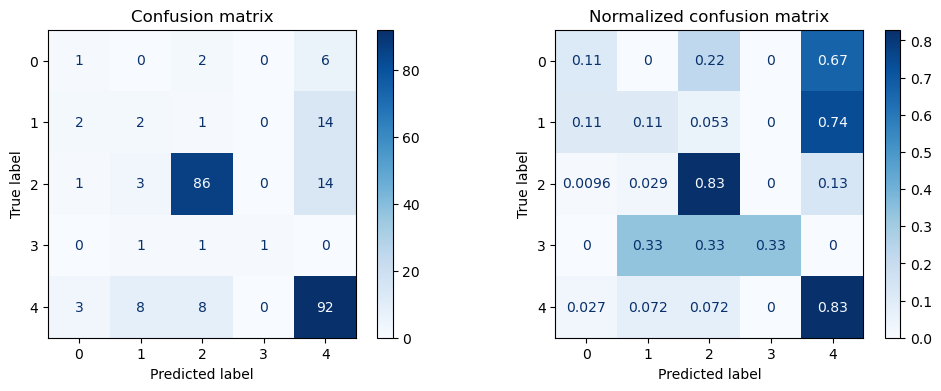

In [260]:
get_evaluation(y_test, prediction, knn_c, X_test)

#### 1 Cycle
Ï†ïÌôïÎèÑÏóê ÎπÑÌï¥ Ïù¥Ïô∏Ïùò ÏàòÏπòÍ∞Ä ÎÇÆÏùÄ Í≤ÉÏùÑ ÌôïÏù∏ÌñàÎã§. ÏÑ±Îä•ÏùÑ Ïò¨Î¶¨Í∏∞ ÏúÑÌï¥ Ïò§Î≤ÑÏÉòÌîåÎßÅÏùÑ Ìï¥Î≥¥Í≥†Ïûê ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | F1 Score  |
|--------|---------|---------|
| 1 Cycle| 0.7398  | 0.4748  |

In [261]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# SMOTEÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=124)
features_resampled, targets_resampled = smote.fit_resample(features, targets)

knn_c = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3, 5, 7]
}

g_knn_c = GridSearchCV(knn_c, param_grid=parameters, cv=5, refit=True, return_train_score=True)
g_knn_c.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]}, return_train_score=True)

In [262]:
result_df = pd.DataFrame(g_knn_c.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  rank_test_score
0  {'n_neighbors': 3}         0.699886                3
1  {'n_neighbors': 5}         0.723293                2
2  {'n_neighbors': 7}         0.735528                1

In [263]:
knn_c = g_knn_c.best_estimator_
prediction = knn_c.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[ 1  0  2  0  6]
 [ 2  2  1  0 14]
 [ 1  3 86  0 14]
 [ 0  1  1  1  0]
 [ 3  8  8  0 92]]
Ï†ïÌôïÎèÑ: 0.7398, Ï†ïÎ∞ÄÎèÑ: 0.5787, Ïû¨ÌòÑÏú®: 0.4411, F1: 0.4748
################################################################################


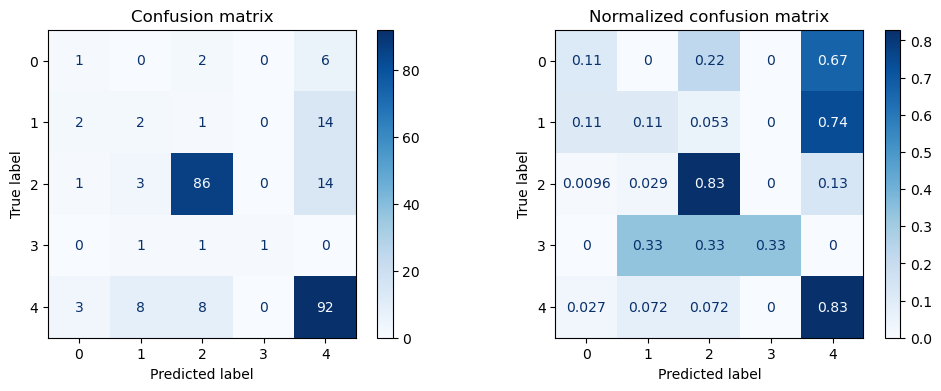

In [264]:
get_evaluation(y_test, prediction, knn_c, X_test)

#### 2 Cycle
Ïò§Î≤ÑÏÉòÌîåÎßÅÏùÑ ÌïòÏòÄÏßÄÎßå Ï†ÑÌòÄ Î≥ÄÌôîÍ∞Ä ÏóÜÏóàÎã§. KNNÎ∂ÑÏÑùÏùÄ Ïó¨Í∏∞ÍπåÏßÄ ÌïòÍ≥† Random ForestÎ∞©ÏãùÏúºÎ°ú Î™®Îç∏ÏùÑ ÌõàÎ†®ÏãúÏºúÎ≥¥Í≥†Ïûê ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | F1 Score  |
|--------|---------|---------|
| 1 Cycle| 0.7398  | 0.4748  |
| 2 Cycle| 0.7398  | 0.4748  |

#### Î∞∞ÍπÖ(Random Forest)

In [271]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'max_depth': [1, 2, 3],
    'min_samples_split': [6, 12, 18, 24]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets = pre_w_df.iloc[:, 1:], pre_w_df.weather

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

g_rfc = GridSearchCV(rfc, param_grid=parameters, cv=5, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_split': [6, 12, 18, 24]})

In [272]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'max_depth': 1, 'min_samples_split': 6}         0.869792   
1   {'max_depth': 1, 'min_samples_split': 12}         0.869792   
2   {'max_depth': 1, 'min_samples_split': 18}         0.869792   
3   {'max_depth': 1, 'min_samples_split': 24}         0.869792   
4    {'max_depth': 2, 'min_samples_split': 6}         0.872843   
5   {'max_depth': 2, 'min_samples_split': 12}         0.879970   
6   {'max_depth': 2, 'min_samples_split': 18}         0.870807   
7   {'max_depth': 2, 'min_samples_split': 24}         0.873868   
8    {'max_depth': 3, 'min_samples_split': 6}         0.951181   
9   {'max_depth': 3, 'min_samples_split': 12}         0.948135   
10  {'max_depth': 3, 'min_samples_split': 18}         0.948135   
11  {'max_depth': 3, 'min_samples_split': 24}         0.951171   

    rank_test_score  
0                 9  
1                 9  
2                 9  
3                 9  
4                 7  
5                 5  
6                 8  
7                 6  
8                 1  
9                 4  
10                3  
11                2

In [273]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [274]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[  0   6   3   0   0]
 [  0  19   0   0   0]
 [  0   0 104   0   0]
 [  0   0   3   0   0]
 [  0   0   0   0 111]]
Ï†ïÌôïÎèÑ: 0.9512, Ï†ïÎ∞ÄÎèÑ: 0.5411, Ïû¨ÌòÑÏú®: 0.6000, F1: 0.5671
################################################################################


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


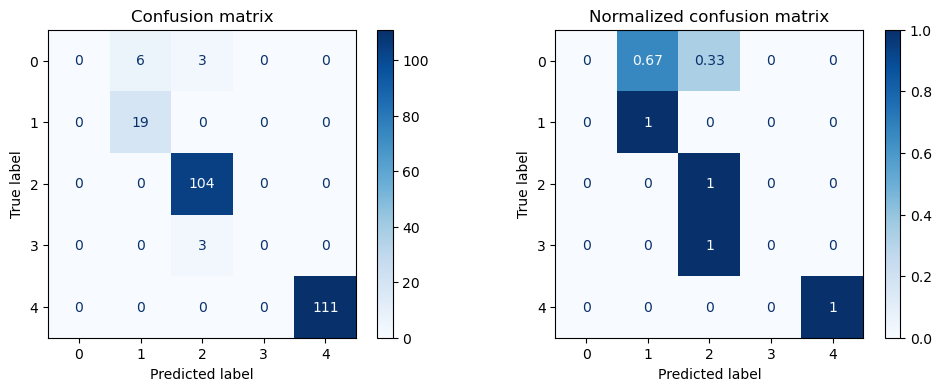

In [275]:
get_evaluation(y_test, prediction, rfc, X_test)

#### 1 Cycle
Ï†ïÌôïÎèÑÎäî ÎÜíÏßÄÎßå, Í∑∏Ïóê ÎπÑÌï¥ Ï†ïÎ∞ÄÎèÑ/Ïû¨ÌòÑÏú®/F1Ïù¥ ÎÇÆÎã§. Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÎπÑÏú®ÏùÑ ÎßûÏ∂∞Ï£ºÎäî Ïä§ÏºÄÏùºÎßÅÏùÑ ÌïòÍ≥†Ïûê ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | F1 Score  |
|--------|---------|---------|
| 1 Cycle| 0.9512  | 0.5671  |

In [280]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'rfc__max_depth': [1, 2, 3],
    'rfc__min_samples_split': [6, 12, 18, 24]
}

rfc = RandomForestClassifier(n_estimators=100)

features, targets = pre_w_df.iloc[:, 1:], pre_w_df.weather

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

rfc_pipe = Pipeline([('max_abs_scaler', MaxAbsScaler()), ('rfc', rfc)])

g_rfc = GridSearchCV(rfc_pipe, param_grid=parameters, cv=5, n_jobs=-1)

g_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('max_abs_scaler', MaxAbsScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [1, 2, 3],
                         'rfc__min_samples_split': [6, 12, 18, 24]})

In [281]:
result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0   {'rfc__max_depth': 1, 'rfc__min_samples_split'...         0.869792   
1   {'rfc__max_depth': 1, 'rfc__min_samples_split'...         0.869792   
2   {'rfc__max_depth': 1, 'rfc__min_samples_split'...         0.869792   
3   {'rfc__max_depth': 1, 'rfc__min_samples_split'...         0.869792   
4   {'rfc__max_depth': 2, 'rfc__min_samples_split'...         0.871822   
5   {'rfc__max_depth': 2, 'rfc__min_samples_split'...         0.869792   
6   {'rfc__max_depth': 2, 'rfc__min_samples_split'...         0.873873   
7   {'rfc__max_depth': 2, 'rfc__min_samples_split'...         0.870807   
8   {'rfc__max_depth': 3, 'rfc__min_samples_split'...         0.947105   
9   {'rfc__max_depth': 3, 'rfc__min_samples_split'...         0.938972   
10  {'rfc__max_depth': 3, 'rfc__min_samples_split'...         0.943049   
11  {'rfc__max_depth': 3, 'rfc__min_samples_split'...         0.945048   

    rank_test_score  
0                 8  
1                 8  
2                 8  
3                 8  
4                 6  
5                 8  
6                 5  
7                 7  
8                 1  
9                 4  
10                3  
11                2

In [282]:
rfc = g_rfc.best_estimator_
prediction = rfc.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[  4   1   4   0   0]
 [  0  18   1   0   0]
 [  0   0 104   0   0]
 [  0   0   3   0   0]
 [  0   0   0   0 111]]
Ï†ïÌôïÎèÑ: 0.9634, Ï†ïÎ∞ÄÎèÑ: 0.7752, Ïû¨ÌòÑÏú®: 0.6784, F1: 0.7051
################################################################################


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


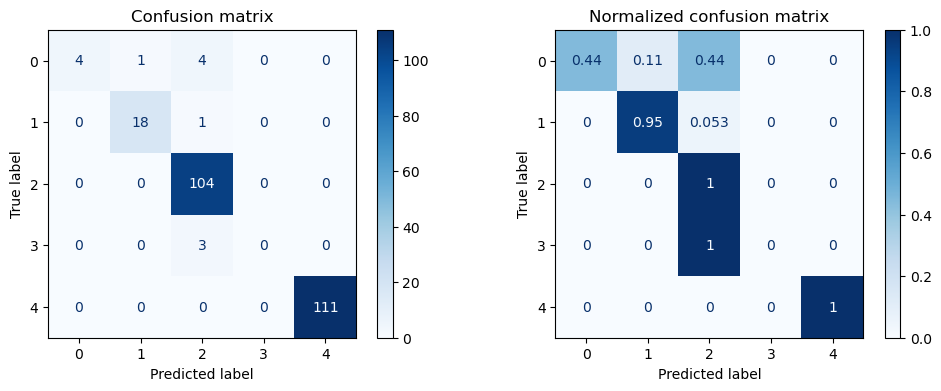

In [283]:
get_evaluation(y_test, prediction, rfc, X_test)

#### 2 Cycle
Ïä§ÏºÄÏùºÎßÅÏùÑ ÏßÑÌñâÌïòÏòÄÎçîÎãà Î™®Îç∏Ïùò ÏÑ±Îä•Ïù¥ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÌïú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.  
Ïó¨Í∏∞ÏÑú RFÎäî ÎßàÎ¨¥Î¶¨ÌïòÍ≥†Ïûê ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | F1 Score  |
|--------|---------|---------|
| 1 Cycle| 0.9512  | 0.5671  |
| 2 Cycle| 0.9634  | 0.7051  |

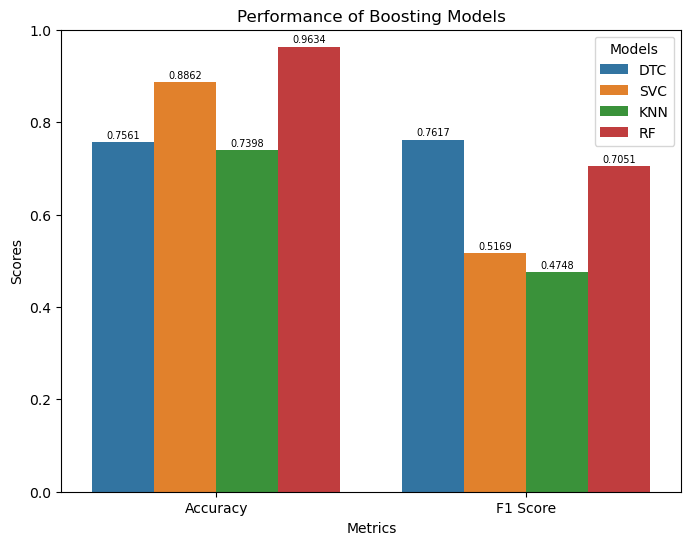

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Í∞Å Î™®Îç∏ÏóêÏÑú ÏñªÏùÄ ÏÑ±Îä• ÏßÄÌëú
model_names = ['DTC', 'SVC', 'KNN', 'RF']
accuracy_scores = [0.7561, 0.8862, 0.7398, 0.9634]
f1_scores = [0.7617, 0.5169, 0.4748, 0.7051]

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
import pandas as pd
df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores
})

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ïû¨Íµ¨ÏÑ±
df = pd.melt(df, id_vars='Model', var_name='Metric', value_name='Score')

# seabornÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ barplot ÏÉùÏÑ±
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='Metric', y='Score', hue='Model')

# Í∞Å ÎßâÎåÄ ÏúÑÏóê ÏàòÏπò ÌëúÏãú
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points',
                fontsize=7)

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance of Boosting Models')
plt.ylim(0, 1)  # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
plt.legend(title='Models')
plt.show()

### Ensemble

### üÜï Voting

In [291]:
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3               2.5       4.4       2.2   2.2        2
4               0.0       7.2       2.8   2.3        2
...             ...       ...       ...   ...      ...
1224            0.0       4.4       0.0   2.5        4
1225            8.6       4.4       1.7   2.9        2
1226            1.5       5.0       1.7   1.3        2
1227            0.0       7.2       0.6   2.6        1
1228            0.0       5.6      -1.0   3.4        4

[1229 rows x 5 columns]

In [292]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

y_train_over.value_counts()

weather
4    442
2    442
1    442
0    442
3    442
Name: count, dtype: int64

In [294]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



dtc_parameters = {'max_depth': [10, 11, 12], 'min_samples_split': [20, 21, 22]}
svc_parameters = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                  'svc__kernel': ['linear', 'rbf']}
knn_parameters = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

dtc = DecisionTreeClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])
g_svc = GridSearchCV(svc_pipe, param_grid=svc_parameters, cv=5, refit=True, return_train_score=True)

knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True)

In [295]:
g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_split': [20, 21, 22]},
             return_train_score=True)

In [296]:
g_svc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [297]:
g_knn.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True)

In [298]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

dtc = g_dtc.best_estimator_

params  mean_test_score  \
0  {'max_depth': 10, 'min_samples_split': 20}         0.755656   
1  {'max_depth': 10, 'min_samples_split': 21}         0.755656   
2  {'max_depth': 10, 'min_samples_split': 22}         0.756561   
3  {'max_depth': 11, 'min_samples_split': 20}         0.762443   
4  {'max_depth': 11, 'min_samples_split': 21}         0.762443   
5  {'max_depth': 11, 'min_samples_split': 22}         0.763348   
6  {'max_depth': 12, 'min_samples_split': 20}         0.757014   
7  {'max_depth': 12, 'min_samples_split': 21}         0.757466   
8  {'max_depth': 12, 'min_samples_split': 22}         0.758371   

   rank_test_score  
0                8  
1                8  
2                7  
3                2  
4                2  
5                1  
6                6  
7                5  
8                4

In [299]:
from sklearn.preprocessing import StandardScaler

svc_result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(svc_result_df['params'][0])
display(svc_result_df)

svc = SVC(C=0.001, kernel='linear', probability=True)
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])

svc_pipe.fit(X_train_over, y_train_over)

{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}


params  mean_test_score  \
0   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.447964   
1   {'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...         0.355204   
2   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.447964   
3   {'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...         0.355656   
4   {'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...         0.447964   
..                                                ...              ...   
67  {'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...         0.800452   
68  {'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...         0.637557   
69  {'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...         0.803620   
70  {'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...         0.637557   
71  {'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...         0.725792   

    rank_test_score  
0                55  
1                68  
2                55  
3                67  
4                55  
..              ...  
67                3  
68               12  
69                1  
70               12  
71                7  

[72 rows x 3 columns]

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('svc', SVC(C=0.001, kernel='linear', probability=True))])

In [300]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
print(knn_result_df['params'].iloc[3])
display(knn_result_df)

knn = KNeighborsClassifier(n_neighbors=9)
knn_pipe = Pipeline([('standard_scaler', StandardScaler()), ('knn', knn)])

knn_pipe.fit(X_train_over, y_train_over)

{'knn__n_neighbors': 9}


params  mean_test_score  rank_test_score
0   {'knn__n_neighbors': 3}         0.761538                1
1   {'knn__n_neighbors': 5}         0.740271                2
2   {'knn__n_neighbors': 7}         0.726697                3
3   {'knn__n_neighbors': 9}         0.712670                4
4  {'knn__n_neighbors': 11}         0.701357                5

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [306]:
from sklearn.ensemble import VotingClassifier

# Ïò§Ï∞® ÌñâÎ†¨
# [[ 1  1  0  0  7]
#  [ 2 10  0  0  7]
#  [ 5 13 70 13  3]
#  [ 0  1  0  2  0]
#  [22 24  0  0 65]]
# Ï†ïÌôïÎèÑ: 0.6016, Ï†ïÎ∞ÄÎèÑ: 0.4327, Ïû¨ÌòÑÏú®: 0.5126, F1: 0.4092
vc = VotingClassifier(estimators=[('dtc', dtc), 
                             ('svc', svc_pipe), 
                             ('knn', knn_pipe)], 
                 voting='hard', 
                 n_jobs=-1)

# Ïò§Ï∞® ÌñâÎ†¨
# [[ 1  0  0  0  8]
#  [ 1  8  1  0  9]
#  [ 3  2 87 10  2]
#  [ 0  1  0  2  0]
#  [21 18  1  0 71]]
# Ï†ïÌôïÎèÑ: 0.6870, Ï†ïÎ∞ÄÎèÑ: 0.4495, Ïû¨ÌòÑÏú®: 0.5350, F1: 0.4530
# vc = VotingClassifier(estimators=[('dtc', dtc), 
#                              ('svc', svc_pipe), 
#                              ('knn', knn_pipe)], 
#                  voting='soft', 
#                  n_jobs=-1)

In [307]:
vc.fit(X_train_over, y_train_over)

VotingClassifier(estimators=[('dtc',
                              DecisionTreeClassifier(max_depth=11,
                                                     min_samples_split=22)),
                             ('svc',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(C=0.001, kernel='linear',
                                                   probability=True))])),
                             ('knn',
                              Pipeline(steps=[('standard_scaler',
                                               StandardScaler()),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=9))]))],
                 n_jobs=-1)

In [308]:
prediction = vc.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[ 1  1  0  0  7]
 [ 2 10  0  0  7]
 [ 5 13 70 13  3]
 [ 0  1  0  2  0]
 [22 24  0  0 65]]
Ï†ïÌôïÎèÑ: 0.6016, Ï†ïÎ∞ÄÎèÑ: 0.4327, Ïû¨ÌòÑÏú®: 0.5126, F1: 0.4092
################################################################################


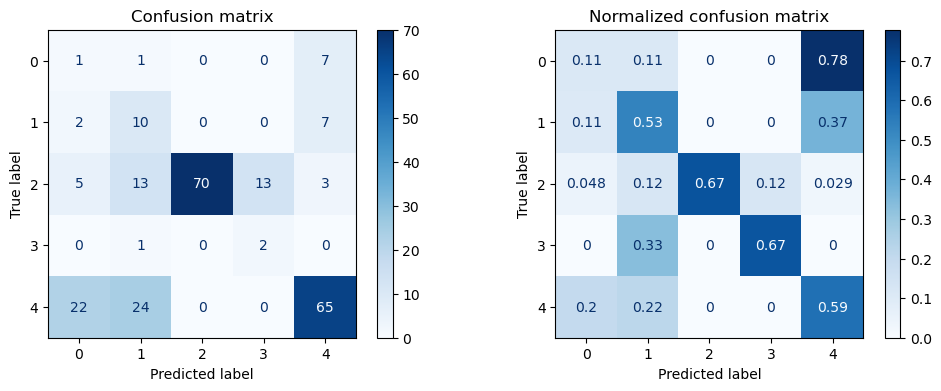

In [309]:
get_evaluation(y_test, prediction, vc, X_test)

#### 1 Cycle
ÌïòÎìúÏôÄ ÏÜåÌîÑÌä∏ 2Î∞©Î≤ï Ï†ÑÎ∂Ä ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ ÎÇòÌÉÄÎÇ¥ÏßÄ ÏïäÏïòÎã§.  
ÌôïÎ•† ÌèâÍ∑†ÏùÑ ÎÇ¥Ïñ¥ Í∞ÄÏû• ÎÜíÏùÄ ÌôïÎ•†Ïùò ÌÉÄÍ≤üÏùÑ ÏµúÏ¢Ö ÏòàÏ∏°Í∞íÏúºÎ°± ÎèÑÏ∂úÌïòÎäî Î∞©ÏãùÏù∏ soft votingÏù¥ hard votingÎ≥¥Îã§ ÏÜåÌè≠ ÎÜíÏùÄ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.  

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | F1 Score  |
|--------|---------|---------|
| hard   | 0.6016  | 0.4092  |
| soft   | 0.6870  | 0.4530  |

### üÜï AdaBoosting

In [58]:
import pandas as pd

w_df = pd.read_csv('./datasets/seattle-weather.csv', low_memory=False)
w_df

date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

In [59]:
pre_w_df = w_df.drop(labels=['date'], axis=1)

In [60]:
pre_w_df.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [61]:
pre_w_df.duplicated().sum()

8

In [62]:
pre_w_df.drop_duplicates(inplace=True)
pre_w_df = pre_w_df.reset_index(drop=True)

In [63]:
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1448            8.6       4.4       1.7   2.9     rain
1449            1.5       5.0       1.7   1.3     rain
1450            0.0       7.2       0.6   2.6      fog
1451            0.0       5.6      -1.0   3.4      sun
1452            0.0       5.6      -2.1   3.5      sun

[1453 rows x 5 columns]

In [64]:
pre_w_df.weather.value_counts()

weather
rain       641
sun        632
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
pre_w_df['weather'] = encoder.fit_transform(pre_w_df['weather'].tolist())

In [66]:
pre_w_df.weather.value_counts()

weather
2    641
4    632
1    101
0     53
3     26
Name: count, dtype: int64

array([[<Axes: title={'center': 'precipitation'}>,
        <Axes: title={'center': 'temp_max'}>],
       [<Axes: title={'center': 'temp_min'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'weather'}>, <Axes: >]], dtype=object)

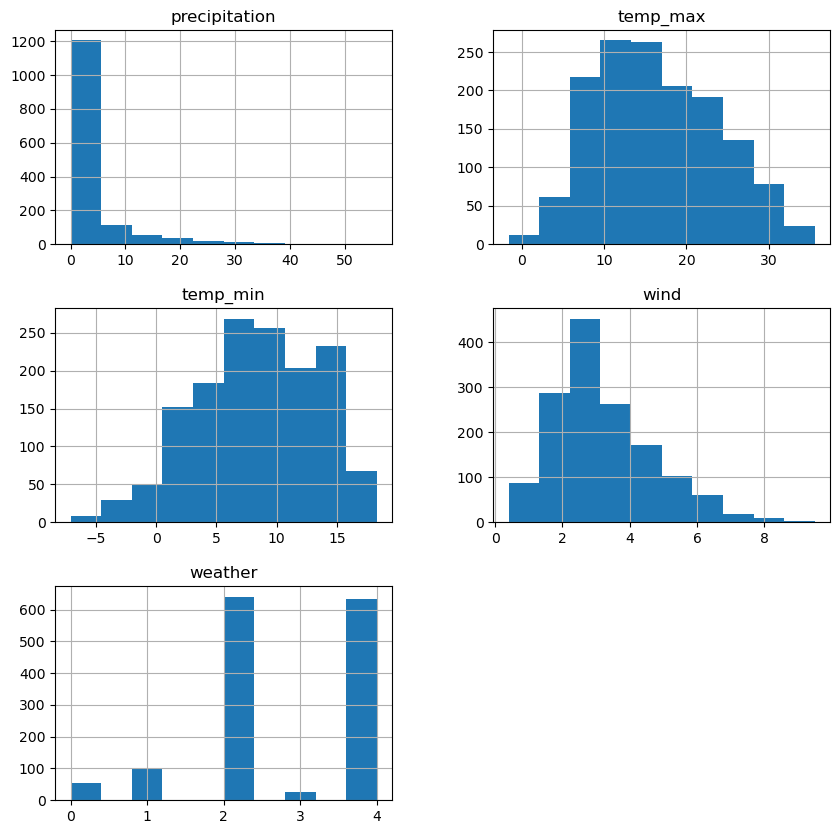

In [67]:
pre_w_df.hist(figsize=(10, 10))

In [68]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_pre_w = std.fit_transform(pre_w_df.iloc[:, :-1])

In [69]:
std_pre_w_df = pd.DataFrame(std_pre_w, columns=pre_w_df.iloc[:, :-1].columns)
std_pre_w_df['weather'] = pre_w_df.weather
std_pre_w_df

precipitation  temp_max  temp_min      wind  weather
0         -0.455155 -0.492401 -0.642601  1.011504        0
1          1.173541 -0.791984 -1.081014  0.872596        2
2         -0.335618 -0.642193 -0.204188 -0.655391        2
3          2.578104 -0.574106 -0.523034  1.011504        2
4         -0.260907 -1.023480 -1.081014  1.983860        2
...             ...       ...       ...       ...      ...
1448       0.829871 -1.636264 -1.300220 -0.238667        2
1449      -0.231023 -1.554560 -1.300220 -1.349931        2
1450      -0.455155 -1.254976 -1.519426 -0.447029        1
1451      -0.455155 -1.472855 -1.838272  0.108603        4
1452      -0.455155 -1.472855 -2.057478  0.178056        4

[1453 rows x 5 columns]

In [70]:
pre_w_df = pre_w_df.iloc[std_pre_w_df.index].reset_index(drop=True)
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3              20.3      12.2       5.6   4.7        2
4               1.3       8.9       2.8   6.1        2
...             ...       ...       ...   ...      ...
1448            8.6       4.4       1.7   2.9        2
1449            1.5       5.0       1.7   1.3        2
1450            0.0       7.2       0.6   2.6        1
1451            0.0       5.6      -1.0   3.4        4
1452            0.0       5.6      -2.1   3.5        4

[1453 rows x 5 columns]

In [71]:
# train, test ÎÇòÎàÑÍ∏∞
from sklearn.model_selection import train_test_split

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [72]:
# ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ ÎπÑÏ§ë ÎßûÏ∂îÍ∏∞
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [73]:
y_train_over.value_counts()

weather
4    513
2    513
1    513
0    513
3    513
Name: count, dtype: int64

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200]})

In [75]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.458090   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.427290   
2   {'learning_rate': 0.3, 'n_estimators': 150}         0.437427   
3   {'learning_rate': 0.3, 'n_estimators': 200}         0.421832   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.505653   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.481092   
6   {'learning_rate': 0.5, 'n_estimators': 150}         0.446784   
7   {'learning_rate': 0.5, 'n_estimators': 200}         0.442495   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.475634   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.492008   
10  {'learning_rate': 0.7, 'n_estimators': 150}         0.463158   
11  {'learning_rate': 0.7, 'n_estimators': 200}         0.434308   
12     {'learning_rate': 1, 'n_estimators': 50}         0.483821   
13    {'learning_rate': 1, 'n_estimators': 100}         0.441715   
14    {'learning_rate': 1, 'n_estimators': 150}         0.440156   
15    {'learning_rate': 1, 'n_estimators': 200}         0.464327   

    rank_test_score  
0                 8  
1                15  
2                13  
3                16  
4                 1  
5                 4  
6                 9  
7                10  
8                 5  
9                 2  
10                7  
11               14  
12                3  
13               11  
14               12  
15                6

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [77]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[  3   3   0   0   5]
 [  2   7   0   0  11]
 [  1   2 118   1   6]
 [  0   0   5   0   0]
 [ 21  61   0   0  45]]
Ï†ïÌôïÎèÑ: 0.5945, Ï†ïÎ∞ÄÎèÑ: 0.3676, Ïû¨ÌòÑÏú®: 0.3798, F1: 0.3425
################################################################################


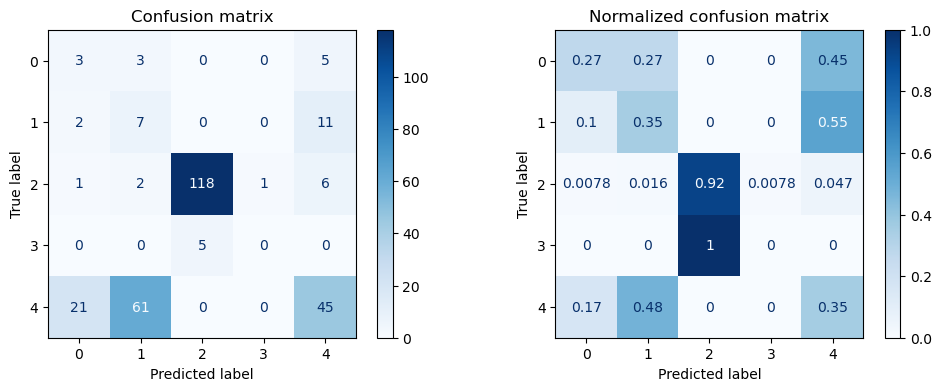

In [78]:
get_evaluation(y_test, prediction, ada, X_test)

#### 1 Cycle
rainÏùÑ Ï†úÏô∏Ìïú ÏòàÏ∏° ÏÑ±Í≥µÎ•†Ïù¥ ÎÇÆÍ∏∞ ÎïåÎ¨∏Ïóê, Ï†ÑÏ≤¥ Ïä§ÏºÄÏùºÎßÅÏùÑ ÌïòÍ≥†Ïûê ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | Ï†ïÎ∞ÄÎèÑ  | Ïû¨ÌòÑÏú®  | F1 score |
|--------|---------|---------|---------|----------|
| 1 Cycle| 0.6942  | 0.4022  | 0.4250  | 0.3858   |

In [79]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

parmeters = {
    'ada__n_estimators': [50, 100, 150],
    'ada__learning_rate': [0.3, 0.5, 0.7, 1]
}

ada_pipe = Pipeline([('min_max_scaler', MaxAbsScaler()), ('ada', AdaBoostClassifier())])

g_ada = GridSearchCV(ada_pipe, param_grid=parmeters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('min_max_scaler', MaxAbsScaler()),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.3, 0.5, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150]})

In [80]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.458090   
1   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.427290   
2   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.437427   
3   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.505653   
4   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.481092   
5   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.446784   
6   {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.475634   
7   {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.492008   
8   {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.463158   
9   {'ada__learning_rate': 1, 'ada__n_estimators':...         0.483821   
10  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.441715   
11  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.447563   

    rank_test_score  
0                 7  
1                12  
2                11  
3                 1  
4                 4  
5                 9  
6                 5  
7                 2  
8                 6  
9                 3  
10               10  
11                8

In [81]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[  3   3   0   0   5]
 [  2   7   0   0  11]
 [  1   2 118   1   6]
 [  0   0   5   0   0]
 [ 21  61   0   0  45]]
Ï†ïÌôïÎèÑ: 0.5945, Ï†ïÎ∞ÄÎèÑ: 0.3676, Ïû¨ÌòÑÏú®: 0.3798, F1: 0.3425
################################################################################


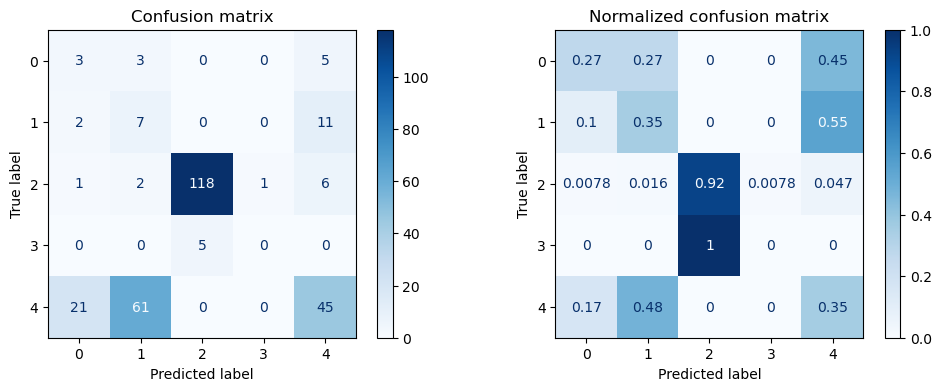

In [82]:
get_evaluation(y_test, prediction, ada, X_test)
# Ï†ïÌôïÎèÑ: 0.6942, Ï†ïÎ∞ÄÎèÑ: 0.4022, Ïû¨ÌòÑÏú®: 0.4250, F1: 0.3858

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

parameters = {
    'ada__n_estimators': [50, 100, 150, 200],
    'ada__learning_rate': [0.3, 0.5, 0.7, 1]
}

ada_pipe = Pipeline([('standard_scaler', StandardScaler()), ('ada', AdaBoostClassifier())])

g_ada = GridSearchCV(ada_pipe, param_grid=parameters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('ada', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'ada__learning_rate': [0.3, 0.5, 0.7, 1],
                         'ada__n_estimators': [50, 100, 150, 200]})

In [84]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.458090   
1   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.427290   
2   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.437427   
3   {'ada__learning_rate': 0.3, 'ada__n_estimators...         0.421832   
4   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.505653   
5   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.481092   
6   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.446784   
7   {'ada__learning_rate': 0.5, 'ada__n_estimators...         0.442495   
8   {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.475634   
9   {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.492008   
10  {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.463158   
11  {'ada__learning_rate': 0.7, 'ada__n_estimators...         0.434308   
12  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.483821   
13  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.441715   
14  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.440156   
15  {'ada__learning_rate': 1, 'ada__n_estimators':...         0.461209   

    rank_test_score  
0                 8  
1                15  
2                13  
3                16  
4                 1  
5                 4  
6                 9  
7                10  
8                 5  
9                 2  
10                6  
11               14  
12                3  
13               11  
14               12  
15                7

In [85]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[  3   3   0   0   5]
 [  2   7   0   0  11]
 [  1   2 118   1   6]
 [  0   0   5   0   0]
 [ 21  61   0   0  45]]
Ï†ïÌôïÎèÑ: 0.5945, Ï†ïÎ∞ÄÎèÑ: 0.3676, Ïû¨ÌòÑÏú®: 0.3798, F1: 0.3425
################################################################################


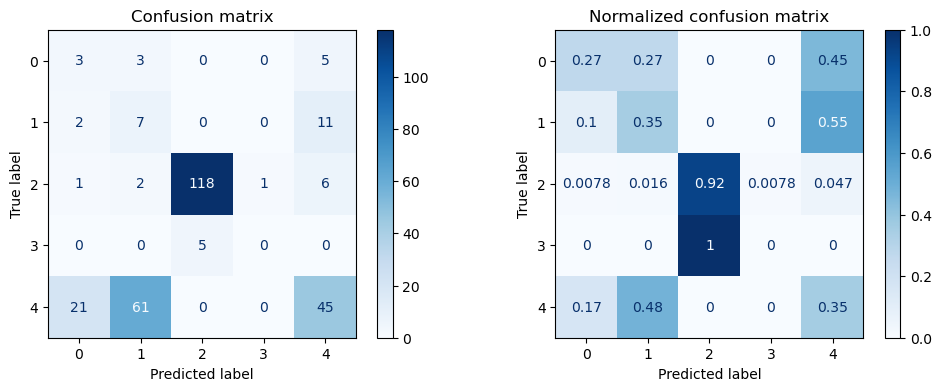

In [86]:
get_evaluation(y_test, prediction, ada, X_test)
# Ï†ïÌôïÎèÑ: 0.6942, Ï†ïÎ∞ÄÎèÑ: 0.4022, Ïû¨ÌòÑÏú®: 0.4250, F1: 0.3858

#### 2 Cycle
Î≥ÄÌôîÍ∞Ä ÏóÜÎã§. Îçî ÎÇòÏùÄ ÏÑ±Îä•ÏùÑ ÏúÑÌï¥ Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Î≥¥Í∏∞Î°ú ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | Ï†ïÎ∞ÄÎèÑ  | Ïû¨ÌòÑÏú®  | F1 score |
|--------|---------|---------|---------|----------|
| 1 Cycle| 0.6942  | 0.4022  | 0.4250  | 0.3858   |
| 2 Cycle| 0.6942  | 0.4022  | 0.4250  | 0.3858   |

In [87]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
features = std_pre_w_df.iloc[:, :-1]
for column in features.columns:
    std_pre_w_df.drop(
        std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].shape[0]}Í±¥')

precipitation: 0Í±¥
temp_max: 0Í±¥
temp_min: 0Í±¥
wind: 0Í±¥


In [88]:
pre_w_df = pre_w_df.iloc[std_pre_w_df.index].reset_index(drop=True)
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3               2.5       4.4       2.2   2.2        2
4               0.0       7.2       2.8   2.3        2
...             ...       ...       ...   ...      ...
1224            0.0       4.4       0.0   2.5        4
1225            8.6       4.4       1.7   2.9        2
1226            1.5       5.0       1.7   1.3        2
1227            0.0       7.2       0.6   2.6        1
1228            0.0       5.6      -1.0   3.4        4

[1229 rows x 5 columns]

In [89]:
pre_w_df.weather.value_counts()

weather
4    553
2    517
1     97
0     45
3     17
Name: count, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [91]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [92]:
y_train_over.value_counts()

weather
4    442
2    442
1    442
0    442
3    442
Name: count, dtype: int64

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parmeters = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=parmeters, cv=5, n_jobs=-1)
g_ada.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200]})

In [94]:
result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.384163   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.321719   
2   {'learning_rate': 0.3, 'n_estimators': 150}         0.328054   
3   {'learning_rate': 0.3, 'n_estimators': 200}         0.327602   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.338462   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.353846   
6   {'learning_rate': 0.5, 'n_estimators': 150}         0.361991   
7   {'learning_rate': 0.5, 'n_estimators': 200}         0.352941   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.297738   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.327149   
10  {'learning_rate': 0.7, 'n_estimators': 150}         0.342534   
11  {'learning_rate': 0.7, 'n_estimators': 200}         0.329864   
12     {'learning_rate': 1, 'n_estimators': 50}         0.393213   
13    {'learning_rate': 1, 'n_estimators': 100}         0.356109   
14    {'learning_rate': 1, 'n_estimators': 150}         0.385973   
15    {'learning_rate': 1, 'n_estimators': 200}         0.386425   

    rank_test_score  
0                 4  
1                15  
2                12  
3                13  
4                10  
5                 7  
6                 5  
7                 8  
8                16  
9                14  
10                9  
11               11  
12                1  
13                6  
14                3  
15                2

In [95]:
ada = g_ada.best_estimator_
prediction = ada.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[ 1  0  8  0  0]
 [ 2  2 15  0  0]
 [ 4  0 97  3  0]
 [ 0  0  1  2  0]
 [ 8  7 90  0  6]]
Ï†ïÌôïÎèÑ: 0.4390, Ï†ïÎ∞ÄÎèÑ: 0.4297, Ïû¨ÌòÑÏú®: 0.3740, F1: 0.2889
################################################################################


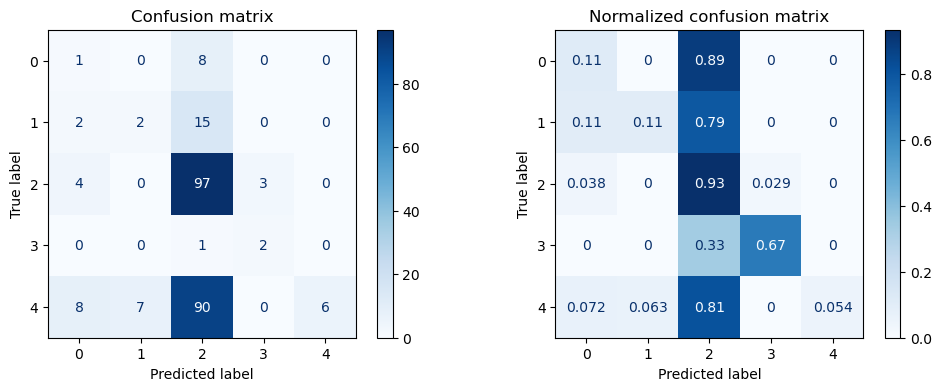

In [96]:
get_evaluation(y_test, prediction, ada, X_test)
# Ï†ïÌôïÎèÑ: 0.6942, Ï†ïÎ∞ÄÎèÑ: 0.4022, Ïû¨ÌòÑÏú®: 0.4250, F1: 0.3858

#### Last Cycle
Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌïòÎ©∞ Ï†ïÌôïÎèÑÏôÄ F1 scoreÎäî Ï¶ùÍ∞ÄÌñàÏúºÎÇò Îç∞Ïù¥ÌÑ∞ ÏàòÍ∞Ä Ï§ÑÏñ¥Îì¨Ïóê Îî∞Îùº Ï†ïÎ∞ÄÎèÑÏôÄ Ïû¨ÌòÑÏö∏Ïù¥ ÎÇÆÏïÑÏ°åÎã§.  
Ï†ïÌôïÌïú ÏòàÏ∏°ÏùÑ ÏúÑÌï¥ Îçî ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏù¥ ÌïÑÏöîÌï† Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§.  
AdaBoostÍ∞Ä ÏïÑÎãå GBMÎ∞©ÏãùÏùÑ ÏÇ¨Ïö©Ìï¥ Î≥¥Í∏∞Î°ú ÌïúÎã§.
| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | Ï†ïÎ∞ÄÎèÑ  | Ïû¨ÌòÑÏú®  | F1 score |
|--------|---------|---------|---------|----------|
| 1 Cycle| 0.6942  | 0.4022  | 0.4250  | 0.3858   |
| 2 Cycle| 0.6942  | 0.4022  | 0.4250  | 0.3858   |
| 3 Cycle| 0.7195  | 0.3679  | 0.3686  | 0.3628   |

### üÜï GBM

In [97]:
import pandas as pd

w_df = pd.read_csv('./datasets/seattle-weather.csv')
w_df

date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

In [98]:
w_df.drop(labels=['date'], axis=1, inplace=True)

In [99]:
pre_w_df = w_df.copy()
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9     rain
1457            1.5       5.0       1.7   1.3     rain
1458            0.0       7.2       0.6   2.6      fog
1459            0.0       5.6      -1.0   3.4      sun
1460            0.0       5.6      -2.1   3.5      sun

[1461 rows x 5 columns]

In [100]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
pre_w_df['weather'] = encoder.fit_transform(pre_w_df['weather'].tolist())

In [101]:
pre_w_df.corr()['weather'].sort_values(ascending=False).iloc[1:]

temp_max         0.322337
temp_min         0.154981
wind            -0.065858
precipitation   -0.267388
Name: weather, dtype: float64

In [102]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingClassifier

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.weather

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=parameters, cv=5)
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200]})

In [103]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.820219   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.817659   
2   {'learning_rate': 0.3, 'n_estimators': 150}         0.810788   
3   {'learning_rate': 0.3, 'n_estimators': 200}         0.809079   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.798819   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.797095   
6   {'learning_rate': 0.5, 'n_estimators': 150}         0.795367   
7   {'learning_rate': 0.5, 'n_estimators': 200}         0.782535   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.787671   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.783398   
10  {'learning_rate': 0.7, 'n_estimators': 150}         0.780826   
11  {'learning_rate': 0.7, 'n_estimators': 200}         0.775687   
12     {'learning_rate': 1, 'n_estimators': 50}         0.737266   
13    {'learning_rate': 1, 'n_estimators': 100}         0.733840   
14    {'learning_rate': 1, 'n_estimators': 150}         0.728697   
15    {'learning_rate': 1, 'n_estimators': 200}         0.726980   

    rank_test_score  
0                 1  
1                 2  
2                 3  
3                 4  
4                 5  
5                 6  
6                 7  
7                10  
8                 8  
9                 9  
10               11  
11               12  
12               13  
13               14  
14               15  
15               16

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [105]:
gbc = g_gbc.best_estimator_
prediction = gbc.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[  0   0   0   0  11]
 [  1   3   0   0  16]
 [  0   0 117   3   9]
 [  0   0   3   2   0]
 [  2   5   0   1 120]]
Ï†ïÌôïÎèÑ: 0.8259, Ï†ïÎ∞ÄÎèÑ: 0.4905, Ïû¨ÌòÑÏú®: 0.4789, F1: 0.4726
################################################################################


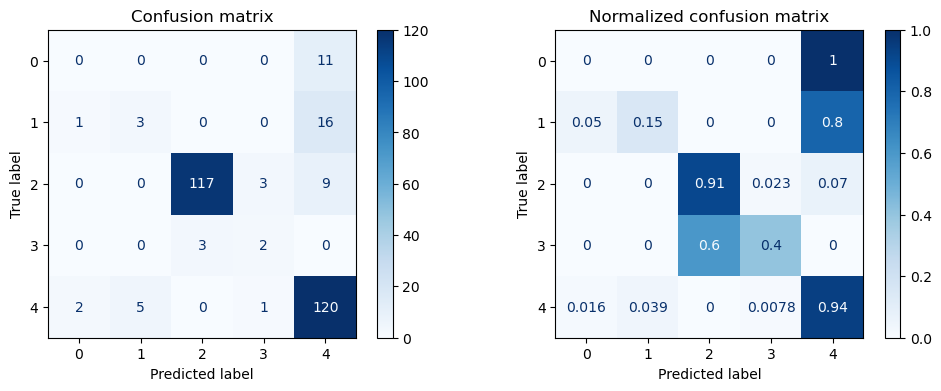

In [106]:
get_evaluation(y_test, prediction, gbc, X_test)

#### 1 Cycle
Ï†ïÌôïÎèÑÏóê ÎπÑÌïú ÎÇòÎ®∏ÏßÄ ÏòàÏ∏° ÏÑ±Îä•Ïù¥ ÎÇÆÎã§. ÌÉÄÏºì Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÏ§ëÏùÑ ÎßûÏ∂∞ Î≥¥Í∏∞Î°ú ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | Ï†ïÎ∞ÄÎèÑ  | Ïû¨ÌòÑÏú®  | F1 score |
|--------|---------|---------|---------|----------|
| 1 Cycle| 0.8259  | 0.4905  | 0.4789  | 0.4726   |

In [107]:
# ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ ÎπÑÏ§ë ÎßûÏ∂îÍ∏∞
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [108]:
y_train_over.value_counts()

weather
4    512
2    512
1    512
3    512
0    512
Name: count, dtype: int64

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200]})

In [110]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.835938   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.842578   
2   {'learning_rate': 0.3, 'n_estimators': 150}         0.845313   
3   {'learning_rate': 0.3, 'n_estimators': 200}         0.845313   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.841797   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.846484   
6   {'learning_rate': 0.5, 'n_estimators': 150}         0.850000   
7   {'learning_rate': 0.5, 'n_estimators': 200}         0.846875   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.828125   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.838672   
10  {'learning_rate': 0.7, 'n_estimators': 150}         0.820703   
11  {'learning_rate': 0.7, 'n_estimators': 200}         0.824609   
12     {'learning_rate': 1, 'n_estimators': 50}         0.823828   
13    {'learning_rate': 1, 'n_estimators': 100}         0.830078   
14    {'learning_rate': 1, 'n_estimators': 150}         0.832031   
15    {'learning_rate': 1, 'n_estimators': 200}         0.832422   

    rank_test_score  
0                 9  
1                 6  
2                 4  
3                 4  
4                 7  
5                 3  
6                 1  
7                 2  
8                13  
9                 8  
10               16  
11               14  
12               15  
13               12  
14               11  
15               10

In [111]:
gbc = g_gbc.best_estimator_
prediction = gbc.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[  0   1   1   0   9]
 [  0   6   1   0  13]
 [  0   0 118   2   9]
 [  0   0   2   3   0]
 [  9  13   3   0 103]]
Ï†ïÌôïÎèÑ: 0.7850, Ï†ïÎ∞ÄÎèÑ: 0.5225, Ïû¨ÌòÑÏú®: 0.5239, F1: 0.5231
################################################################################


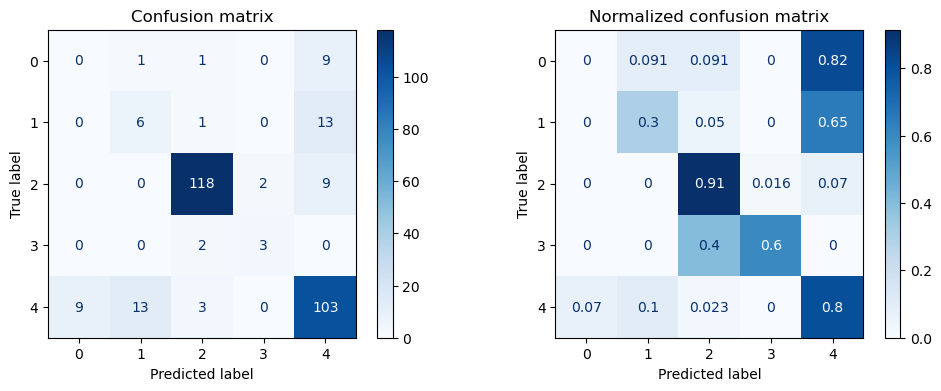

In [112]:
get_evaluation(y_test, prediction, gbc, X_test)
# Ï†ïÌôïÎèÑ: 0.8259, Ï†ïÎ∞ÄÎèÑ: 0.4905, Ïû¨ÌòÑÏú®: 0.4789, F1: 0.4726

#### 2 Cycle
Ï†ÑÎ∂Ä ÏÜåÌè≠ Í∞êÏÜåÌñàÎã§. Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Î≥¥Í∏∞Î°ú ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | Ï†ïÎ∞ÄÎèÑ  | Ïû¨ÌòÑÏú®  | F1 score |
|--------|---------|---------|---------|----------|
| 1 Cycle| 0.8259  | 0.4905  | 0.4789  | 0.4726   |
| 2 Cycle| 0.7816  | 0.4511  | 0.4755  | 0.4591   |

In [113]:
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3              20.3      12.2       5.6   4.7        2
4               1.3       8.9       2.8   6.1        2
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9        2
1457            1.5       5.0       1.7   1.3        2
1458            0.0       7.2       0.6   2.6        1
1459            0.0       5.6      -1.0   3.4        4
1460            0.0       5.6      -2.1   3.5        4

[1461 rows x 5 columns]

In [114]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
features = std_pre_w_df.iloc[:, :-1]
for column in features.columns:
    std_pre_w_df.drop(
        std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].shape[0]}Í±¥')

precipitation: 0Í±¥
temp_max: 0Í±¥
temp_min: 0Í±¥
wind: 0Í±¥


In [115]:
pre_w_df = pre_w_df.iloc[std_pre_w_df.index].reset_index(drop=True)
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3               2.5       4.4       2.2   2.2        2
4               0.0       7.2       2.8   2.3        2
...             ...       ...       ...   ...      ...
1224           18.5       8.9       4.4   5.1        2
1225            0.0       8.3       2.8   4.1        1
1226            4.3       7.8       4.4   6.7        2
1227           27.4       5.6       2.8   4.3        2
1228            4.6       7.8       2.8   5.0        2

[1229 rows x 5 columns]

In [116]:
from sklearn.model_selection import train_test_split

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [117]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [118]:
y_train_over.value_counts()

weather
4    446
2    446
1    446
0    446
3    446
Name: count, dtype: int64

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

g_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, cv=5, n_jobs=-1)
g_gbc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200]})

In [120]:
result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.813004   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.834978   
2   {'learning_rate': 0.3, 'n_estimators': 150}         0.835874   
3   {'learning_rate': 0.3, 'n_estimators': 200}         0.835426   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.827354   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.831839   
6   {'learning_rate': 0.5, 'n_estimators': 150}         0.832735   
7   {'learning_rate': 0.5, 'n_estimators': 200}         0.833632   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.820628   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.829148   
10  {'learning_rate': 0.7, 'n_estimators': 150}         0.829148   
11  {'learning_rate': 0.7, 'n_estimators': 200}         0.829148   
12     {'learning_rate': 1, 'n_estimators': 50}         0.813004   
13    {'learning_rate': 1, 'n_estimators': 100}         0.820179   
14    {'learning_rate': 1, 'n_estimators': 150}         0.817937   
15    {'learning_rate': 1, 'n_estimators': 200}         0.822870   

    rank_test_score  
0                15  
1                 3  
2                 1  
3                 2  
4                10  
5                 6  
6                 5  
7                 4  
8                12  
9                 7  
10                7  
11                7  
12               16  
13               13  
14               14  
15               11

In [121]:
gbc = g_gbc.best_estimator_
prediction = gbc.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[ 1  0  1  0  7]
 [ 1  3  0  0 12]
 [ 2  0 95  4  5]
 [ 0  0  1  2  0]
 [ 7  6  3  0 96]]
Ï†ïÌôïÎèÑ: 0.8008, Ï†ïÎ∞ÄÎèÑ: 0.5015, Ïû¨ÌòÑÏú®: 0.5437, F1: 0.5069
################################################################################


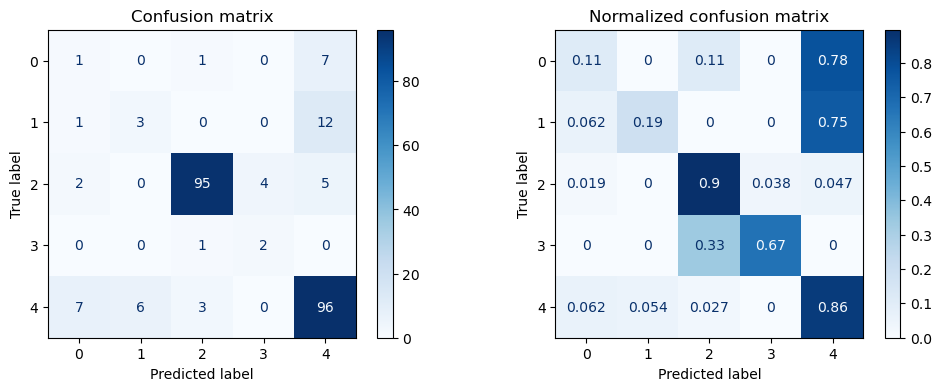

In [122]:
get_evaluation(y_test, prediction, gbc, X_test)
# Ï†ïÌôïÎèÑ: 0.7816, Ï†ïÎ∞ÄÎèÑ: 0.4511, Ïû¨ÌòÑÏú®: 0.4755, F1: 0.4591

#### Last Cycle
Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌïòÎãà Ï†ïÌôïÎèÑÎäî ÏÜåÌè≠ ÏÉÅÏäπÌñàÏúºÎÇò, Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÅÏñ¥ÏÑú ÏÑ±Îä•ÏùÑ Îçî Ïò¨Î¶¨Í∏∞Îäî ÏâΩÏßÄ ÏïäÏùÑ Í≤É Í∞ôÎã§.  
Îã§ÏùåÏùÄ XGBoost Î∞©ÏãùÏùÑ ÏÇ¨Ïö©Ìï¥Î≥¥Í≥†Ïûê ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | Ï†ïÎ∞ÄÎèÑ  | Ïû¨ÌòÑÏú®  | F1 score |
|--------|---------|---------|---------|----------|
| 1 Cycle| 0.8259  | 0.4905  | 0.4789  | 0.4726   |
| 2 Cycle| 0.7816  | 0.4511  | 0.4755  | 0.4591   |
| 3 Cycle| 0.8008  | 0.5015  | 0.5437  | 0.5069   |

### üÜï XGBoost

In [123]:
import pandas as pd

w_df = pd.read_csv('./datasets/seattle-weather.csv')
w_df

date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

In [124]:
w_df.drop(labels=['date'], axis=1, inplace=True)

In [125]:
pre_w_df = w_df.copy()

In [126]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
pre_w_df['weather'] = encoder.fit_transform(pre_w_df['weather'].tolist())

In [127]:
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3              20.3      12.2       5.6   4.7        2
4               1.3       8.9       2.8   6.1        2
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9        2
1457            1.5       5.0       1.7   1.3        2
1458            0.0       7.2       0.6   2.6        1
1459            0.0       5.6      -1.0   3.4        4
1460            0.0       5.6      -2.1   3.5        4

[1461 rows x 5 columns]

In [128]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.weather

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

y_train_over.value_counts()

weather
4    512
2    512
1    512
3    512
0    512
Name: count, dtype: int64

In [129]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, 
                     param_grid=parameters, 
                     cv=5, 
                     refit=True, 
                     return_train_score=True, 
                     n_jobs=-1)

g_xgb.fit(X_train, y_train, early_stopping_rounds=50, eval_set=evals)

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[0]	validation_0-mlogloss:1.11739	validation_1-mlogloss:1.11434
[1]	validation_0-mlogloss:0.87383	validation_1-mlogloss:0.86667
[2]	validation_0-mlogloss:0.71846	validation_1-mlogloss:0.71097
[3]	validation_0-mlogloss:0.60937	validation_1-mlogloss:0.60183
[4]	validation_0-mlogloss:0.53259	validation_1-mlogloss:0.52322
[5]	validation_0-mlogloss:0.47488	validation_1-mlogloss:0.46801
[6]	validation_0-mlogloss:0.43397	validation_1-mlogloss:0.42361
[7]	validation_0-mlogloss:0.40081	validation_1-mlogloss:0.39005
[8]	validation_0-mlogloss:0.37483	validation_1-mlogloss:0.36319
[9]	validation_0-mlogloss:0.35545	validation_1-mlogloss:0.34468
[10]	validation_0-mlogloss:0.34185	validation_1-mlogloss:0.32969
[11]	validation_0-mlogloss:0.33014	validation_1-mlogloss:0.31699
[12]	validation_0-mlogloss:0.31944	validation_1-mlogloss:0.30556
[13]	validation_0-mlogloss:0.30943	validation_1-mlogloss:0.29236
[14]	validation_0-mlogloss:0.30164	validation_1-mlogloss:0.28380
[15]	validation_0-mlogloss:0.29422	

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True)

In [130]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.827930   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.815946   
2   {'learning_rate': 0.3, 'n_estimators': 150}         0.818510   
3   {'learning_rate': 0.3, 'n_estimators': 200}         0.818510   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.810807   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.806518   
6   {'learning_rate': 0.5, 'n_estimators': 150}         0.807377   
7   {'learning_rate': 0.5, 'n_estimators': 200}         0.807377   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.814233   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.815084   
10  {'learning_rate': 0.7, 'n_estimators': 150}         0.815084   
11  {'learning_rate': 0.7, 'n_estimators': 200}         0.815084   
12     {'learning_rate': 1, 'n_estimators': 50}         0.811647   
13    {'learning_rate': 1, 'n_estimators': 100}         0.809937   
14    {'learning_rate': 1, 'n_estimators': 150}         0.809937   
15    {'learning_rate': 1, 'n_estimators': 200}         0.809937   

    rank_test_score  
0                 1  
1                 4  
2                 2  
3                 2  
4                10  
5                16  
6                14  
7                14  
8                 8  
9                 5  
10                5  
11                5  
12                9  
13               11  
14               11  
15               11

In [131]:
xgb = g_xgb.best_estimator_
prediction = xgb.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[  0   1   1   0   9]
 [  0   1   0   0  19]
 [  0   0 116   4   9]
 [  0   0   3   2   0]
 [  2   3   1   0 122]]
Ï†ïÌôïÎèÑ: 0.8225, Ï†ïÎ∞ÄÎèÑ: 0.4519, Ïû¨ÌòÑÏú®: 0.4605, F1: 0.4444
################################################################################


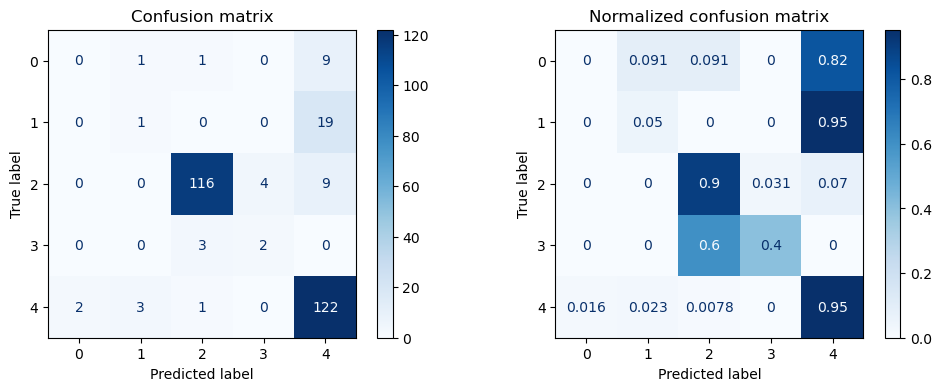

In [132]:
get_evaluation(y_test, prediction, xgb, X_test)

#### 1 Cycle
Ï†ïÌôïÎèÑ Ïô∏Ïùò ÏÑ±Îä•Ïù¥ ÎÜíÏßÄ ÏïäÎã§. Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Î≥¥Í∏∞Î°ú ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | Ï†ïÎ∞ÄÎèÑ  | Ïû¨ÌòÑÏú®  | F1 score |
|--------|---------|---------|---------|----------|
| 1 Cycle| 0.8225  | 0.4519  | 0.4605  | 0.4444   |

In [133]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
features = std_pre_w_df.iloc[:, :-1]
for column in features.columns:
    std_pre_w_df.drop(
        std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].shape[0]}Í±¥')

precipitation: 0Í±¥
temp_max: 0Í±¥
temp_min: 0Í±¥
wind: 0Í±¥


In [134]:
pre_w_df = pre_w_df.iloc[std_pre_w_df.index].reset_index(drop=True)
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3               2.5       4.4       2.2   2.2        2
4               0.0       7.2       2.8   2.3        2
...             ...       ...       ...   ...      ...
1224           18.5       8.9       4.4   5.1        2
1225            0.0       8.3       2.8   4.1        1
1226            4.3       7.8       4.4   6.7        2
1227           27.4       5.6       2.8   4.3        2
1228            4.6       7.8       2.8   5.0        2

[1229 rows x 5 columns]

In [135]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.weather

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

y_train_over.value_counts()

weather
4    446
2    446
1    446
0    446
3    446
Name: count, dtype: int64

In [136]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

parameters = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, 
                     param_grid=parameters, 
                     cv=5, 
                     refit=True, 
                     return_train_score=True, 
                     n_jobs=-1)

g_xgb.fit(X_train, y_train, early_stopping_rounds=50, eval_set=evals)

[0]	validation_0-mlogloss:1.11683	validation_1-mlogloss:1.14162
[1]	validation_0-mlogloss:0.87194	validation_1-mlogloss:0.90516
[2]	validation_0-mlogloss:0.71716	validation_1-mlogloss:0.75519
[3]	validation_0-mlogloss:0.61204	validation_1-mlogloss:0.65111
[4]	validation_0-mlogloss:0.53416	validation_1-mlogloss:0.57799
[5]	validation_0-mlogloss:0.47688	validation_1-mlogloss:0.51712
[6]	validation_0-mlogloss:0.43512	validation_1-mlogloss:0.47219
[7]	validation_0-mlogloss:0.40278	validation_1-mlogloss:0.43652
[8]	validation_0-mlogloss:0.37699	validation_1-mlogloss:0.40958
[9]	validation_0-mlogloss:0.35610	validation_1-mlogloss:0.38929
[10]	validation_0-mlogloss:0.33927	validation_1-mlogloss:0.36651
[11]	validation_0-mlogloss:0.32403	validation_1-mlogloss:0.35167
[12]	validation_0-mlogloss:0.31193	validation_1-mlogloss:0.33849
[13]	validation_0-mlogloss:0.30419	validation_1-mlogloss:0.32773
[14]	validation_0-mlogloss:0.29732	validation_1-mlogloss:0.32015
[15]	validation_0-mlogloss:0.29062	

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True)

In [137]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.818922   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.808774   
2   {'learning_rate': 0.3, 'n_estimators': 150}         0.806744   
3   {'learning_rate': 0.3, 'n_estimators': 200}         0.806744   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.807749   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.806728   
6   {'learning_rate': 0.5, 'n_estimators': 150}         0.806728   
7   {'learning_rate': 0.5, 'n_estimators': 200}         0.806728   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.809795   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.809795   
10  {'learning_rate': 0.7, 'n_estimators': 150}         0.809795   
11  {'learning_rate': 0.7, 'n_estimators': 200}         0.809795   
12     {'learning_rate': 1, 'n_estimators': 50}         0.797571   
13    {'learning_rate': 1, 'n_estimators': 100}         0.797571   
14    {'learning_rate': 1, 'n_estimators': 150}         0.797571   
15    {'learning_rate': 1, 'n_estimators': 200}         0.797571   

    rank_test_score  
0                 1  
1                 6  
2                 8  
3                 8  
4                 7  
5                10  
6                10  
7                10  
8                 2  
9                 2  
10                2  
11                2  
12               13  
13               13  
14               13  
15               13

In [138]:
xgb = g_xgb.best_estimator_
prediction = xgb.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[  1   0   0   0   8]
 [  0   1   0   0  15]
 [  0   0 100   1   5]
 [  0   0   2   1   0]
 [  2   3   2   0 105]]
Ï†ïÌôïÎèÑ: 0.8455, Ï†ïÎ∞ÄÎèÑ: 0.5669, Ïû¨ÌòÑÏú®: 0.4776, F1: 0.4952
################################################################################


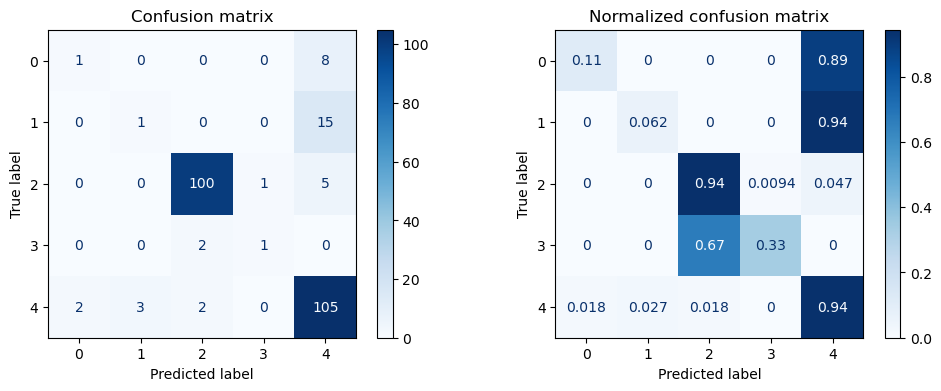

In [139]:
get_evaluation(y_test, prediction, xgb, X_test)
# Ï†ïÌôïÎèÑ: 0.7927, Ï†ïÎ∞ÄÎèÑ: 0.4967, Ïû¨ÌòÑÏú®: 0.5479, F1: 0.5087

#### 2 Cycle
Î≥ÄÌôîÍ∞Ä Ï†ÑÌòÄ ÏóÜÎã§. Ï†ÑÏ≤¥ Ïä§ÏºÄÏùºÎßÅÏùÑ ÏßÑÌñâÌï¥Î≥¥Í≥†Ïûê ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | Ï†ïÎ∞ÄÎèÑ  | Ïû¨ÌòÑÏú®  | F1 score |
|--------|---------|---------|---------|----------|
| 1 Cycle| 0.8225  | 0.4519  | 0.4605  | 0.4444   |
| 2 Cycle| 0.8455  | 0.5669  | 0.4776  | 0.4952   |

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

parameters = {
    'xgb__n_estimators': [50, 100, 150, 200],
    'xgb__learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb_pipe = Pipeline([('standard_scaler', StandardScaler()), ('xgb', XGBClassifier())])

g_xgb = GridSearchCV(xgb_pipe, param_grid=parameters, cv=5, n_jobs=-1)
g_xgb.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importanc...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.3, 0.5, 0.7, 1],
                         'xgb__n_estimators': [50, 100, 150, 200]})

In [141]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0   {'xgb__learning_rate': 0.3, 'xgb__n_estimators...         0.839910   
1   {'xgb__learning_rate': 0.3, 'xgb__n_estimators...         0.848430   
2   {'xgb__learning_rate': 0.3, 'xgb__n_estimators...         0.850673   
3   {'xgb__learning_rate': 0.3, 'xgb__n_estimators...         0.850673   
4   {'xgb__learning_rate': 0.5, 'xgb__n_estimators...         0.847085   
5   {'xgb__learning_rate': 0.5, 'xgb__n_estimators...         0.850224   
6   {'xgb__learning_rate': 0.5, 'xgb__n_estimators...         0.851121   
7   {'xgb__learning_rate': 0.5, 'xgb__n_estimators...         0.848430   
8   {'xgb__learning_rate': 0.7, 'xgb__n_estimators...         0.846637   
9   {'xgb__learning_rate': 0.7, 'xgb__n_estimators...         0.846188   
10  {'xgb__learning_rate': 0.7, 'xgb__n_estimators...         0.849327   
11  {'xgb__learning_rate': 0.7, 'xgb__n_estimators...         0.848430   
12  {'xgb__learning_rate': 1, 'xgb__n_estimators':...         0.846637   
13  {'xgb__learning_rate': 1, 'xgb__n_estimators':...         0.849327   
14  {'xgb__learning_rate': 1, 'xgb__n_estimators':...         0.853363   
15  {'xgb__learning_rate': 1, 'xgb__n_estimators':...         0.851570   

    rank_test_score  
0                16  
1                 9  
2                 4  
3                 4  
4                12  
5                 6  
6                 3  
7                 9  
8                13  
9                15  
10                7  
11                9  
12               14  
13                7  
14                1  
15                2

In [142]:
xgb = g_xgb.best_estimator_
prediction = xgb.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[ 1  1  0  0  7]
 [ 2  5  0  0  9]
 [ 1  0 96  5  4]
 [ 0  0  2  1  0]
 [13  5  6  0 88]]
Ï†ïÌôïÎèÑ: 0.7764, Ï†ïÎ∞ÄÎèÑ: 0.4836, Ïû¨ÌòÑÏú®: 0.4897, F1: 0.4768
################################################################################


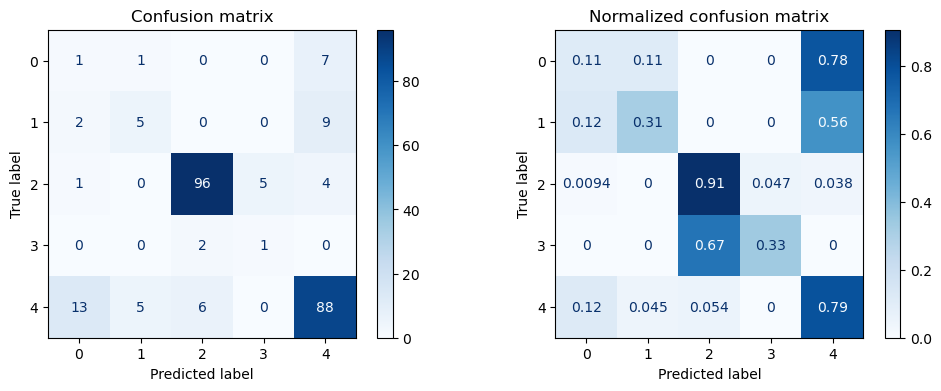

In [143]:
get_evaluation(y_test, prediction, xgb, X_test)
# Ï†ïÌôïÎèÑ: 0.8455, Ï†ïÎ∞ÄÎèÑ: 0.5669, Ïû¨ÌòÑÏú®: 0.4776, F1: 0.4952

In [144]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

parmeters = {
    'xgb__n_estimators': [50, 100, 150],
    'xgb__learning_rate': [0.3, 0.5, 0.7, 1]
}

xgb_pipe = Pipeline([('min_max_scaler', MaxAbsScaler()), ('xgb', XGBClassifier())])

g_xgb = GridSearchCV(xgb_pipe, param_grid=parmeters, cv=5, n_jobs=-1)
g_xgb.fit(X_train_over, y_train_over)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('min_max_scaler', MaxAbsScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_t...
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.3, 0.5, 0.7, 1],
                         'xgb__n_estimators': [50, 100, 150]})

In [145]:
result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0   {'xgb__learning_rate': 0.3, 'xgb__n_estimators...         0.839910   
1   {'xgb__learning_rate': 0.3, 'xgb__n_estimators...         0.848430   
2   {'xgb__learning_rate': 0.3, 'xgb__n_estimators...         0.850673   
3   {'xgb__learning_rate': 0.5, 'xgb__n_estimators...         0.847085   
4   {'xgb__learning_rate': 0.5, 'xgb__n_estimators...         0.850224   
5   {'xgb__learning_rate': 0.5, 'xgb__n_estimators...         0.851121   
6   {'xgb__learning_rate': 0.7, 'xgb__n_estimators...         0.846637   
7   {'xgb__learning_rate': 0.7, 'xgb__n_estimators...         0.846188   
8   {'xgb__learning_rate': 0.7, 'xgb__n_estimators...         0.849327   
9   {'xgb__learning_rate': 1, 'xgb__n_estimators':...         0.846637   
10  {'xgb__learning_rate': 1, 'xgb__n_estimators':...         0.849327   
11  {'xgb__learning_rate': 1, 'xgb__n_estimators':...         0.853363   

    rank_test_score  
0                12  
1                 7  
2                 3  
3                 8  
4                 4  
5                 2  
6                 9  
7                11  
8                 5  
9                10  
10                5  
11                1

In [146]:
xgb = g_xgb.best_estimator_
prediction = xgb.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[ 1  1  0  0  7]
 [ 2  5  0  0  9]
 [ 1  0 96  5  4]
 [ 0  0  2  1  0]
 [13  5  6  0 88]]
Ï†ïÌôïÎèÑ: 0.7764, Ï†ïÎ∞ÄÎèÑ: 0.4836, Ïû¨ÌòÑÏú®: 0.4897, F1: 0.4768
################################################################################


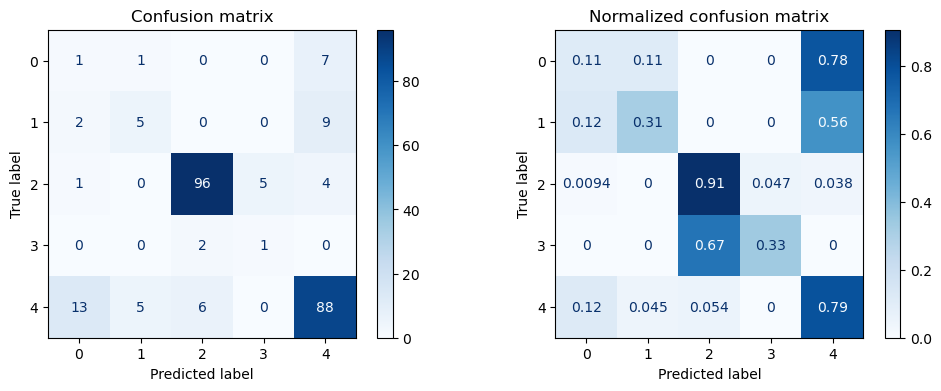

In [147]:
get_evaluation(y_test, prediction, xgb, X_test)
# Ï†ïÌôïÎèÑ: 0.8455, Ï†ïÎ∞ÄÎèÑ: 0.5669, Ïû¨ÌòÑÏú®: 0.4776, F1: 0.4952

#### Last Cycle
StandardÏôÄ MaxAbsScaler 2Í∞ÄÏßÄ Î∞©Î≤ïÏúºÎ°ú Ïä§ÏºÄÏùºÎßÅÏùÑ ÏßÑÌñâÌñàÏúºÎÇò Îëê Î∞©Î≤ï Ï†ÑÎ∂Ä ÌïòÍ∏∞ Ï†ÑÎ≥¥Îã§ Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏÑ±Îä•Ïù¥ ÏÜåÌè≠ Í∞êÏÜåÌñàÎã§.  
Ïó≠ÏãúÎÇò Îçî ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏù¥ ÌïÑÏöîÌïòÎã§Í≥† ÏÉùÍ∞ÅÎêúÎã§. Îã§ÏùåÏùÄ LightGBM Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï¥Î≥∏Îã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | Ï†ïÎ∞ÄÎèÑ  | Ïû¨ÌòÑÏú®  | F1 score |
|--------|---------|---------|---------|----------|
| 1 Cycle| 0.8225  | 0.4519  | 0.4605  | 0.4444   |
| 2 Cycle| 0.8455  | 0.5669  | 0.4776  | 0.4952   |
| 3 Cycle| 0.7764  | 0.4836  | 0.4897  | 0.4768   |

### üÜï LightGBM

In [148]:
w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9     rain
1457            1.5       5.0       1.7   1.3     rain
1458            0.0       7.2       0.6   2.6      fog
1459            0.0       5.6      -1.0   3.4      sun
1460            0.0       5.6      -2.1   3.5      sun

[1461 rows x 5 columns]

In [149]:
w_df.drop_duplicates(inplace=True)
w_df = w_df.reset_index(drop=True)
w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7  drizzle
1              10.9      10.6       2.8   4.5     rain
2               0.8      11.7       7.2   2.3     rain
3              20.3      12.2       5.6   4.7     rain
4               1.3       8.9       2.8   6.1     rain
...             ...       ...       ...   ...      ...
1448            8.6       4.4       1.7   2.9     rain
1449            1.5       5.0       1.7   1.3     rain
1450            0.0       7.2       0.6   2.6      fog
1451            0.0       5.6      -1.0   3.4      sun
1452            0.0       5.6      -2.1   3.5      sun

[1453 rows x 5 columns]

In [150]:
pre_w_df = w_df.copy()

In [151]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
pre_w_df['weather'] = encoder.fit_transform(w_df['weather'].tolist())

In [152]:
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3              20.3      12.2       5.6   4.7        2
4               1.3       8.9       2.8   6.1        2
...             ...       ...       ...   ...      ...
1448            8.6       4.4       1.7   2.9        2
1449            1.5       5.0       1.7   1.3        2
1450            0.0       7.2       0.6   2.6        1
1451            0.0       5.6      -1.0   3.4        4
1452            0.0       5.6      -2.1   3.5        4

[1453 rows x 5 columns]

In [153]:
pre_w_df.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [154]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
features = std_pre_w_df.iloc[:, :-1]
for column in features.columns:
    std_pre_w_df.drop(
        std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_pre_w_df[~std_pre_w_df[column].between(-1.96, 1.96)].shape[0]}Í±¥')

precipitation: 0Í±¥
temp_max: 0Í±¥
temp_min: 0Í±¥
wind: 0Í±¥


In [155]:
pre_w_df = pre_w_df.iloc[std_pre_w_df.index].reset_index(drop=True)
pre_w_df

precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3               2.5       4.4       2.2   2.2        2
4               0.0       7.2       2.8   2.3        2
...             ...       ...       ...   ...      ...
1224            0.0       4.4       0.0   2.5        4
1225            8.6       4.4       1.7   2.9        2
1226            1.5       5.0       1.7   1.3        2
1227            0.0       7.2       0.6   2.6        1
1228            0.0       5.6      -1.0   3.4        4

[1229 rows x 5 columns]

In [156]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

parameters = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train, y_train, eval_set=evals)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 983, number of used features: 4
[LightGBM] [Info] Start training from score -3.307090
[LightGBM] [Info] Start training from score -2.533900
[LightGBM] [Info] Start training from score -0.867162
[LightGBM] [Info] Start training from score -4.251552
[LightGBM] [Info] Start training from score -0.799299
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 200, 500]},
             return_train_score=True)

In [157]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

lgbm = g_lgbm.best_estimator_

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.788428   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.774179   
2   {'learning_rate': 0.3, 'n_estimators': 200}         0.775179   
3   {'learning_rate': 0.3, 'n_estimators': 500}         0.770097   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.675401   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.651854   
6   {'learning_rate': 0.5, 'n_estimators': 200}         0.654905   
7   {'learning_rate': 0.5, 'n_estimators': 500}         0.653895   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.457702   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.457702   
10  {'learning_rate': 0.7, 'n_estimators': 200}         0.457702   
11  {'learning_rate': 0.7, 'n_estimators': 500}         0.457702   
12     {'learning_rate': 1, 'n_estimators': 50}         0.441769   
13    {'learning_rate': 1, 'n_estimators': 100}         0.441769   
14    {'learning_rate': 1, 'n_estimators': 200}         0.441769   
15    {'learning_rate': 1, 'n_estimators': 500}         0.441769   

    rank_test_score  
0                 1  
1                 3  
2                 2  
3                 4  
4                 5  
5                 8  
6                 6  
7                 7  
8                 9  
9                 9  
10                9  
11                9  
12               13  
13               13  
14               13  
15               13

In [158]:
prediction = lgbm.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[ 1  0  0  0  8]
 [ 0  5  2  0 12]
 [ 2  0 95  4  3]
 [ 0  0  1  2  0]
 [ 3  9  3  0 96]]
Ï†ïÌôïÎèÑ: 0.8089, Ï†ïÎ∞ÄÎèÑ: 0.5209, Ïû¨ÌòÑÏú®: 0.5639, F1: 0.5285
################################################################################


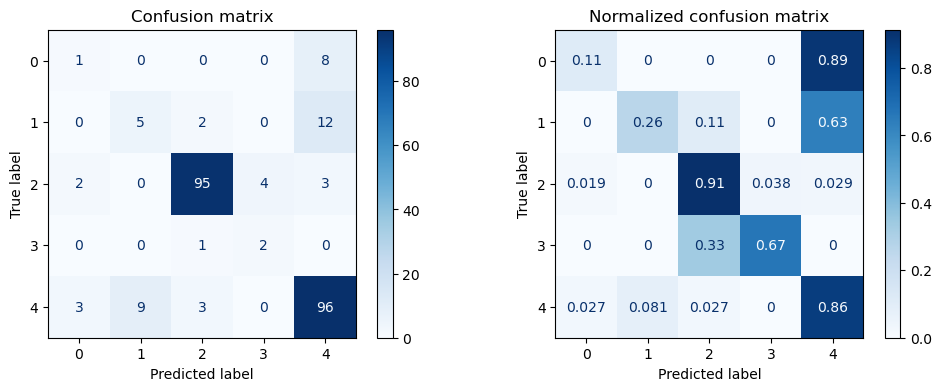

In [159]:
get_evaluation(y_test, prediction, lgbm, X_test)

#### 1 Cycle
Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏÑ±Îä•ÏùÑ ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ÏÑú ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞Ïùò ÎπÑÏ§ëÏùÑ ÎßûÏ∂îÍ≥†Ïûê ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | Ï†ïÎ∞ÄÎèÑ  | Ïû¨ÌòÑÏú®  | F1 score |
|--------|---------|---------|---------|----------|
| 1 Cycle| 0.8089  | 0.5209  | 0.5639  | 0.5285   |

In [160]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

features, targets = pre_w_df.iloc[:, :-1], pre_w_df.iloc[:, -1]

parameters = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)

smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over, eval_set=evals)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 2210, number of used features: 4
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 200, 500]},
             return_train_score=True)

In [161]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

lgbm = g_lgbm.best_estimator_

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.866968   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.860633   
2   {'learning_rate': 0.3, 'n_estimators': 200}         0.857919   
3   {'learning_rate': 0.3, 'n_estimators': 500}         0.856561   
4    {'learning_rate': 0.5, 'n_estimators': 50}         0.857919   
5   {'learning_rate': 0.5, 'n_estimators': 100}         0.856561   
6   {'learning_rate': 0.5, 'n_estimators': 200}         0.856561   
7   {'learning_rate': 0.5, 'n_estimators': 500}         0.857466   
8    {'learning_rate': 0.7, 'n_estimators': 50}         0.855204   
9   {'learning_rate': 0.7, 'n_estimators': 100}         0.851584   
10  {'learning_rate': 0.7, 'n_estimators': 200}         0.853846   
11  {'learning_rate': 0.7, 'n_estimators': 500}         0.854751   
12     {'learning_rate': 1, 'n_estimators': 50}         0.695475   
13    {'learning_rate': 1, 'n_estimators': 100}         0.694118   
14    {'learning_rate': 1, 'n_estimators': 200}         0.694570   
15    {'learning_rate': 1, 'n_estimators': 500}         0.696833   

    rank_test_score  
0                 1  
1                 2  
2                 3  
3                 6  
4                 3  
5                 6  
6                 6  
7                 5  
8                 9  
9                12  
10               11  
11               10  
12               14  
13               16  
14               15  
15               13

In [162]:
prediction = lgbm.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[ 1  0  0  0  8]
 [ 3  5  1  0 10]
 [ 2  2 94  4  2]
 [ 0  0  1  2  0]
 [ 9 10  2  0 90]]
Ï†ïÌôïÎèÑ: 0.7805, Ï†ïÎ∞ÄÎèÑ: 0.4943, Ïû¨ÌòÑÏú®: 0.5511, F1: 0.5101
################################################################################


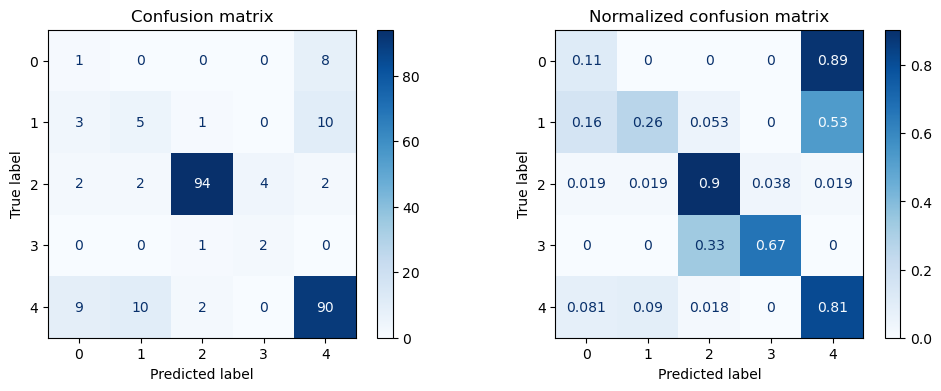

In [163]:
get_evaluation(y_test, prediction, lgbm, X_test)
# Ï†ïÌôïÎèÑ: 0.8089, Ï†ïÎ∞ÄÎèÑ: 0.5209, Ïû¨ÌòÑÏú®: 0.5639, F1: 0.5285

#### 2 Cycle
Ïù¥Ï†ÑÎ≥¥Îã§ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏÑ±Îä•Ïù¥ ÏÜåÌè≠ ÏÉÅÏäπÌïú Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§. Ï†ÑÏ≤¥ Ïä§ÏºÄÏùºÎßÅÏùÑ ÏßÑÌñâÌïòÏó¨ featureÏùò ÎπÑÏ§ëÎèÑ ÎßûÏ∂∞Î≥¥Í≥†Ïûê ÌïúÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | Ï†ïÎ∞ÄÎèÑ  | Ïû¨ÌòÑÏú®  | F1 score |
|--------|---------|---------|---------|----------|
| 1 Cycle| 0.8089  | 0.5209  | 0.5639  | 0.5285   |
| 2 Cycle| 0.7927  | 0.5209  | 0.5639  | 0.5285   |

In [164]:
import numpy as np

pre_w_df.precipitation = np.log1p(pre_w_df.precipitation)

<Axes: >

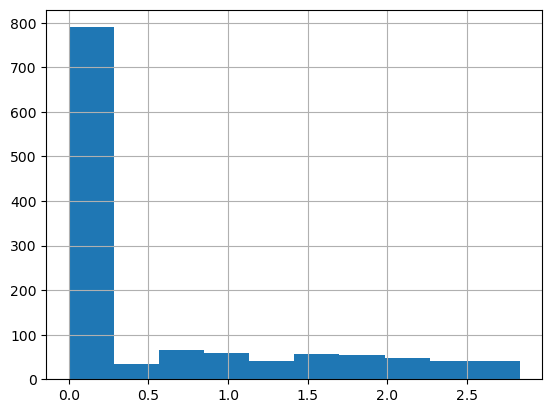

In [165]:
pre_w_df.precipitation.hist()

In [166]:
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# SMOTEÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ìï¥Í≤∞
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò ÏÑ∏Ìä∏ Ï∂îÍ∞Ä
evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

# ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ïÏùò
xgb_pipe = Pipeline([('standard_scaler', StandardScaler()), ('lgbm', LGBMClassifier())])

# Í∑∏Î¶¨Îìú ÏÑúÏπòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ ÌäúÎãù
parameters = {
    'lgbm__n_estimators': [50, 100, 200, 500],
    'lgbm__learning_rate': [0.3, 0.5, 0.7, 1]
}
g_lgbm = GridSearchCV(xgb_pipe, param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 988
[LightGBM] [Info] Number of data points in the train set: 2210, number of used features: 4
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('lgbm', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'lgbm__learning_rate': [0.3, 0.5, 0.7, 1],
                         'lgbm__n_estimators': [50, 100, 200, 500]},
             return_train_score=True)

In [167]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

lgbm = g_lgbm.best_estimator_

params  mean_test_score  \
0   {'lgbm__learning_rate': 0.3, 'lgbm__n_estimato...         0.856561   
1   {'lgbm__learning_rate': 0.3, 'lgbm__n_estimato...         0.852036   
2   {'lgbm__learning_rate': 0.3, 'lgbm__n_estimato...         0.854299   
3   {'lgbm__learning_rate': 0.3, 'lgbm__n_estimato...         0.853846   
4   {'lgbm__learning_rate': 0.5, 'lgbm__n_estimato...         0.853846   
5   {'lgbm__learning_rate': 0.5, 'lgbm__n_estimato...         0.849774   
6   {'lgbm__learning_rate': 0.5, 'lgbm__n_estimato...         0.849774   
7   {'lgbm__learning_rate': 0.5, 'lgbm__n_estimato...         0.849321   
8   {'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...         0.851584   
9   {'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...         0.850679   
10  {'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...         0.849774   
11  {'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...         0.847511   
12  {'lgbm__learning_rate': 1, 'lgbm__n_estimators...         0.493213   
13  {'lgbm__learning_rate': 1, 'lgbm__n_estimators...         0.493665   
14  {'lgbm__learning_rate': 1, 'lgbm__n_estimators...         0.492760   
15  {'lgbm__learning_rate': 1, 'lgbm__n_estimators...         0.492760   

    rank_test_score  
0                 1  
1                 5  
2                 2  
3                 3  
4                 3  
5                 8  
6                 8  
7                11  
8                 6  
9                 7  
10                8  
11               12  
12               14  
13               13  
14               15  
15               15

In [168]:
prediction = lgbm.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[ 1  0  0  0  8]
 [ 3  5  3  0  8]
 [ 3  0 93  5  3]
 [ 0  0  1  2  0]
 [ 9 11  2  0 89]]
Ï†ïÌôïÎèÑ: 0.7724, Ï†ïÎ∞ÄÎèÑ: 0.4848, Ïû¨ÌòÑÏú®: 0.5474, F1: 0.4990
################################################################################


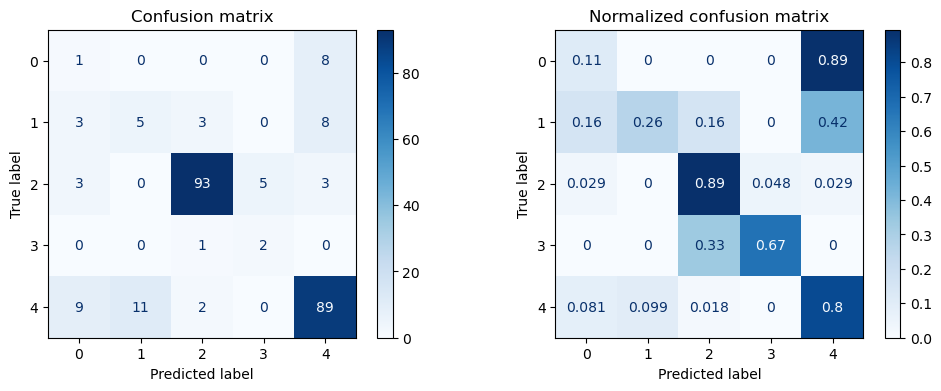

In [169]:
get_evaluation(y_test, prediction, lgbm, X_test)
# Ï†ïÌôïÎèÑ: 0.7927, Ï†ïÎ∞ÄÎèÑ: 0.4967, Ïû¨ÌòÑÏú®: 0.5479, F1: 0.5087

In [170]:
from sklearn.preprocessing import MaxAbsScaler
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# SMOTEÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ìï¥Í≤∞
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò ÏÑ∏Ìä∏ Ï∂îÍ∞Ä
evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

# ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ïÏùò
xgb_pipe = Pipeline([('maxabs_scaler', MaxAbsScaler()), ('lgbm', LGBMClassifier())])

# Í∑∏Î¶¨Îìú ÏÑúÏπòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ ÌäúÎãù
parameters = {
    'lgbm__n_estimators': [50, 100, 200, 500],
    'lgbm__learning_rate': [0.3, 0.5, 0.7, 1]
}
g_lgbm = GridSearchCV(xgb_pipe, param_grid=parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train_over, y_train_over)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 2210, number of used features: 4
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('maxabs_scaler', MaxAbsScaler()),
                                       ('lgbm', LGBMClassifier())]),
             n_jobs=-1,
             param_grid={'lgbm__learning_rate': [0.3, 0.5, 0.7, 1],
                         'lgbm__n_estimators': [50, 100, 200, 500]},
             return_train_score=True)

In [171]:
result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

lgbm = g_lgbm.best_estimator_

params  mean_test_score  \
0   {'lgbm__learning_rate': 0.3, 'lgbm__n_estimato...         0.866968   
1   {'lgbm__learning_rate': 0.3, 'lgbm__n_estimato...         0.860633   
2   {'lgbm__learning_rate': 0.3, 'lgbm__n_estimato...         0.857919   
3   {'lgbm__learning_rate': 0.3, 'lgbm__n_estimato...         0.856561   
4   {'lgbm__learning_rate': 0.5, 'lgbm__n_estimato...         0.857919   
5   {'lgbm__learning_rate': 0.5, 'lgbm__n_estimato...         0.856561   
6   {'lgbm__learning_rate': 0.5, 'lgbm__n_estimato...         0.856561   
7   {'lgbm__learning_rate': 0.5, 'lgbm__n_estimato...         0.857466   
8   {'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...         0.855204   
9   {'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...         0.851584   
10  {'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...         0.853846   
11  {'lgbm__learning_rate': 0.7, 'lgbm__n_estimato...         0.854751   
12  {'lgbm__learning_rate': 1, 'lgbm__n_estimators...         0.695475   
13  {'lgbm__learning_rate': 1, 'lgbm__n_estimators...         0.694118   
14  {'lgbm__learning_rate': 1, 'lgbm__n_estimators...         0.694570   
15  {'lgbm__learning_rate': 1, 'lgbm__n_estimators...         0.696833   

    rank_test_score  
0                 1  
1                 2  
2                 3  
3                 6  
4                 3  
5                 6  
6                 6  
7                 5  
8                 9  
9                12  
10               11  
11               10  
12               14  
13               16  
14               15  
15               13

In [172]:
prediction = lgbm.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[ 1  0  0  0  8]
 [ 3  5  1  0 10]
 [ 2  2 94  4  2]
 [ 0  0  1  2  0]
 [ 9 10  2  0 90]]
Ï†ïÌôïÎèÑ: 0.7805, Ï†ïÎ∞ÄÎèÑ: 0.4943, Ïû¨ÌòÑÏú®: 0.5511, F1: 0.5101
################################################################################


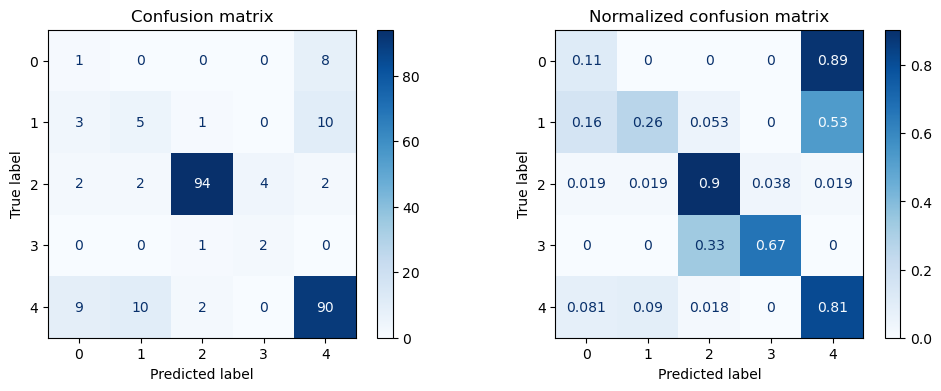

In [173]:
get_evaluation(y_test, prediction, lgbm, X_test)
# standard scaler : Ï†ïÌôïÎèÑ: 0.3902, Ï†ïÎ∞ÄÎèÑ: 0.2913, Ïû¨ÌòÑÏú®: 0.2278, F1: 0.2306
# Ï†ïÌôïÎèÑ: 0.7927, Ï†ïÎ∞ÄÎèÑ: 0.4967, Ïû¨ÌòÑÏú®: 0.5479, F1: 0.5087

#### Last Cycle
Ïä§ÏºÄÏùºÎßÅ Ï†ÑÎ≥¥Îã§ ÌõÑÏóê Î™®Îç∏ ÏÑ±Îä•Ïù¥ ÏÜåÌè≠ Í∞êÏÜåÌïú Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.  
ÌïòÏßÄÎßå Ï†ïÎ∞ÄÎèÑÏôÄ F1 scoreÎ∂ÄÎ∂ÑÏóêÏÑú MaxAbsScalerÍ∞Ä StandardScaler Î≥¥Îã§Îäî ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏ÏóêÏÑú Îçî ÎÇòÏùÄ Ïä§ÏºÄÏùºÎßÅ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï£ºÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.

| Íµ¨Î∂Ñ   | Ï†ïÌôïÎèÑ  | Ï†ïÎ∞ÄÎèÑ  | Ïû¨ÌòÑÏú®  | F1 score |
|--------|---------|---------|---------|----------|
| 1 Cycle| 0.8089  | 0.5209  | 0.5639  | 0.5285   |
| 2 Cycle| 0.7927  | 0.5209  | 0.5639  | 0.5285   |
| 3 Cycle| 0.7927  | 0.4967  | 0.5479  | 0.5087   |

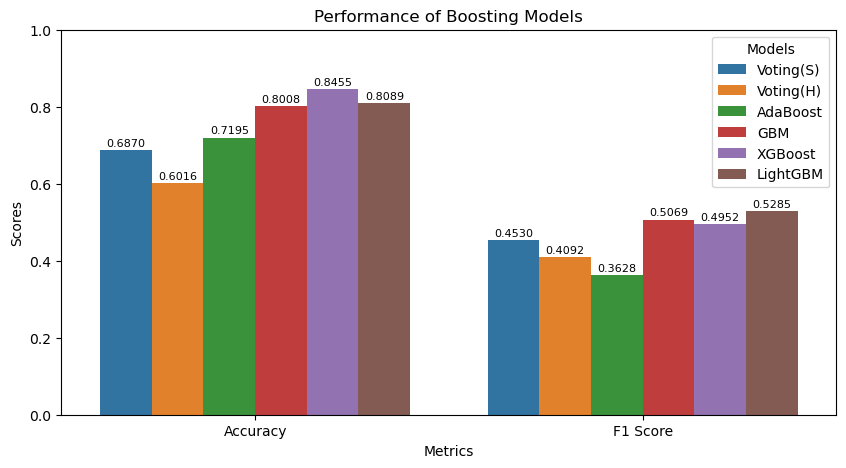

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Í∞Å Î™®Îç∏ÏóêÏÑú ÏñªÏùÄ ÏÑ±Îä• ÏßÄÌëú (ÏûÑÏùòÏùò Í∞í ÏÇ¨Ïö©)
model_names = ['Voting(S)', 'Voting(H)', 'AdaBoost', 'GBM', 'XGBoost', 'LightGBM']
accuracy_scores = [0.6870, 0.6016, 0.7195, 0.8008, 0.8455, 0.8089]
f1_scores = [0.4530, 0.4092, 0.3628, 0.5069, 0.4952, 0.5285]

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
import pandas as pd
df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores
})

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ïû¨Íµ¨ÏÑ±
df = pd.melt(df, id_vars='Model', var_name='Metric', value_name='Score')

# seabornÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ barplot ÏÉùÏÑ±
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df, x='Metric', y='Score', hue='Model')

# Í∞Å ÎßâÎåÄ ÏúÑÏóê ÏàòÏπò ÌëúÏãú
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points',
                fontsize=8)

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance of Boosting Models')
plt.ylim(0, 1)  # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
plt.legend(title='Models')
plt.show()